# Previsão do Volume de Tráfego na I-94: Uma Abordagem Integrada com Modelos Estatísticos, Machine Learning e Deep Learning

## Índice
1. [Introdução](#1-introdução)

2. [Exploração e Preparação dos Dados](#2-exploração-e-preparação-dos-dados)
   - [Análise descritiva](#2.1-análise-descritiva)
   - [Variável Target](#2.2-variável-target)
   - [Duplicados](#2.3-duplicados)
   - [Valores em Falta e respetivo preenchimento](#2.4-valores-em-falta-e-respetivo-preenchimento)
   - [Atributos Numéricos](#2.5-atributos-numéricos)
   - [Atributos Categóricos](#2.6-atributos-categóricos)
   - [Matriz de correlação](#2.7-matriz-de-correlação)
   - [Combinações de variáveis](#2.8-combinações-de-variáveis)
   - [Outliers](#2.9-outliers)

3. [Modelos Estatísticos](#3-statistical-models)

4. [Modelos de Machine Learning](#4-machine-learning-models)

5. [Modelos de Deep Learning](#5-deep-learning)

6. [Comparações](#6-comparações)


## 1. Introdução
Este projeto utiliza o conjunto de dados "Metro Interstate Traffic Volume", disponibilizado pelo repositório de machine learning da UCI. O dataset original regista o volume de tráfego horário na direção oeste da autoestrada I-94, entre Minneapolis e St. Paul, Minnesota, durante o período de 2012 a 2018. Para os objetivos deste trabalho prático, os dados foram reduzidos ao intervalo de julho de 2016 a 2018, incluindo informações como volume de tráfego, condições meteorológicas, feriados e dados temporais.

O objetivo principal do projeto é desenvolver modelos preditivos capazes de realizar previsões de curto e longo prazo do volume de tráfego com base nos dados fornecidos. A metodologia CRISP-DM será utilizada para estruturar o processo, abrangendo desde a exploração e preparação dos dados até à avaliação e comparação de modelos. Serão criados e analisados modelos estatísticos, de machine learning e de deep learning, incluindo redes LSTM e GRU, com o objetivo de identificar as abordagens mais eficazes para prever o tráfego.

Por fim, este trabalho pretende fornecer insights sobre o comportamento do tráfego em condições variáveis, contribuindo para a otimização da gestão e planeamento de tráfego em áreas urbanas.

Carregaram-se as bibliotecas necessárias e preparou-se o ambiente para a análise.

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
from itertools import product
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler

# 2. Exploração e Preparação dos Dados

Carregou-se o conjunto de dados num DataFrame para análise.

In [15]:
# Load the dataset
data_path = 'Metro_Interstate_Traffic_Volume_reduced.csv' 
df = pd.read_csv(data_path)

df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


Verificaram-se os tipos de dados das colunas.

In [17]:

# Check data types
df.dtypes


date_time               object
holiday                 object
weather_main            object
weather_description     object
rain_1h                float64
snow_1h                float64
clouds_all               int64
temp                   float64
traffic_volume           int64
dtype: object

<div class="alert alert-block alert-info">
Concluiu-se que existe uma variedade de dados no conjunto. Existem variáveis categóricas, como date_time, holiday, weather_main e weather_description, que representam informações descritivas sobre dados temporais e atmosféricos. Há também variáveis numéricas inteiras, como clouds_all e traffic_volume. Variáveis numéricas com casas decimais, como rain_1h, snow_1h e temp, representam dados contínuos com precisão decimal.
</div>

## 2.1 Análise descritiva 

In [19]:
df.info

<bound method DataFrame.info of                  date_time holiday  weather_main     weather_description  \
0      2016-07-01 00:00:00     NaN         Clear            sky is clear   
1      2016-07-01 01:00:00     NaN         Clear            sky is clear   
2      2016-07-01 02:00:00     NaN         Clear            sky is clear   
3      2016-07-01 03:00:00     NaN         Clear            sky is clear   
4      2016-07-01 04:00:00     NaN         Clear            sky is clear   
...                    ...     ...           ...                     ...   
23617  2018-09-30 19:00:00     NaN        Clouds           broken clouds   
23618  2018-09-30 20:00:00     NaN        Clouds         overcast clouds   
23619  2018-09-30 21:00:00     NaN  Thunderstorm  proximity thunderstorm   
23620  2018-09-30 22:00:00     NaN        Clouds         overcast clouds   
23621  2018-09-30 23:00:00     NaN        Clouds         overcast clouds   

       rain_1h  snow_1h  clouds_all    temp  traffic_vo

In [21]:

# Descriptive statistics for numerical columns
df.describe()


,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


 Executou-se uma operação de processamento de dados ou análise.

<div class="alert alert-block alert-info">

A análise descritiva das variáveis numéricas do dataset forneceu informações sobre a distribuição e as características dos dados como:

Contagem (count): Todas as variáveis tem 23622 observações.

Média (mean): A média de chuva por hora, 0.495 mm, é muito baixa considerando o máximo de 9831.3 mm. Para snow_1h a média e a mediana são 0, o que indica que não há neve reportada no conjunto de dados. Para clouds_all tem-se uma média de 47.24%, indicando que, em média, o céu está parcialmente nublado.

Desvio padrão (std): Muito alto (63.97 mm) para a rain_1h, indicando que há valores extremos que distorcem a média.

Valores mínimos (min) e máximos (max): A clouds_All apresenta um intervalo entre 0% e 100%, o que significa que é uma variável bem distribuída, e poderá ser útil para a análise. Para temp os valores variam de 243.39 K a 310.07 K, o que indica uma variação consistente com um clima temperado. PAra o traffic_volume os valores vão de 0 a 7280 veículos por hora. A distribuição parece razoável, mas há casos de tráfego zero (possivelmente durante horários ou dias específicos, como feriados).

Quartis (25%, 50%, 75%): Os quartis mostram a distribuição dos dados. Por exemplo, 50% do tráfego está associado a uma temperatura de 284.76 K.

</div>

## 2.2 Variável Target

Contaram-se os valores da variável alvo para entender a distribuição.

In [23]:
goal = df['traffic_volume']
counts = goal.value_counts()
percent = goal.value_counts(normalize=True)
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Quantidade': counts, 'Percentagem': percent100})

,Quantidade,Percentagem
traffic_volume,,
353,29,0.1%
358,26,0.1%
373,24,0.1%
344,24,0.1%
352,23,0.1%
...,...,...
2955,1,0.0%
3874,1,0.0%
1562,1,0.0%


A análise da variável traffic_volume revelou que a maioria dos valores ocorre raramente, enquanto alguns valores, como 353, aparecem com maior frequência. A variabilidade alta indica que traffic_volume é uma variável contínua com poucos padrões repetidos.

Plotaram-se gráficos para visualização dos dados.

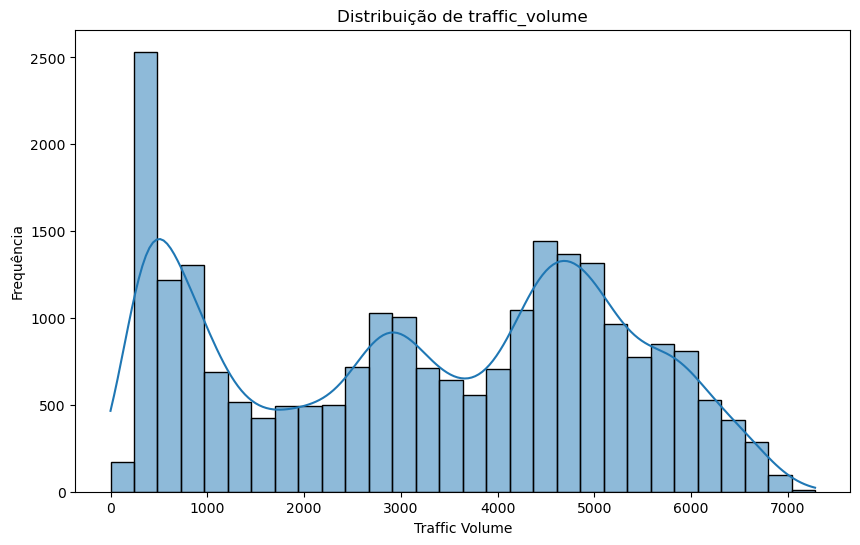

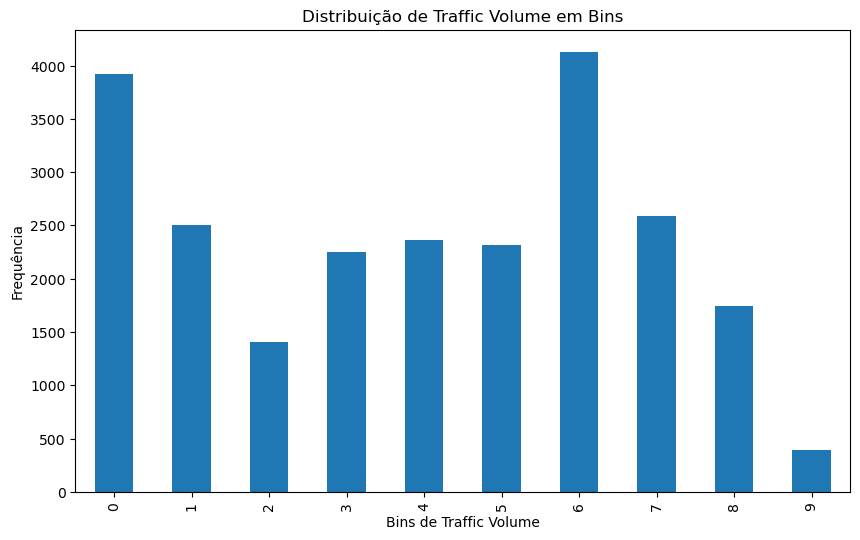

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.title('Distribuição de traffic_volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequência')
plt.show()

# Criar uma nova coluna para bins sem alterar a coluna original
df['traffic_volume_bins'] = pd.cut(df['traffic_volume'], bins=10, labels=False)

# Visualizar a distribuição dos bins
plt.figure(figsize=(10, 6))
df['traffic_volume_bins'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Traffic Volume em Bins')
plt.xlabel('Bins de Traffic Volume')
plt.ylabel('Frequência')
plt.show()

<div class="alert alert-block alert-info">
A distribuição de traffic_volume apresenta dois picos: um em valores baixos, o que indica períodos de tráfego reduzido, e outro entre 4000 e 5000, representando horários de pico. O agrupamento em bins reforça estes padrões, com a maioria dos valores concentrada em intervalos baixos e médios. Isto sugere que padrões temporais e correlações com variáveis como temp e rain_1h podem ser úteis para entender os fatores que influenciam o volume de tráfego.
</div>

## 2.3 Duplicados

Removeu-se as colunas duplicadas do conjunto de dados para garantir que os dados não contenham repetições que possam distorcer análises e os modelos, levando a resultados menos precisos.

In [27]:
print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (23622, 10)
Shape after deleting duplicate values: (23607, 10)


<div class="alert alert-block alert-info">
Conclui-se que antes de remover os valores duplicados, o dataset tinha um total de 23622 registos com 10 colunas. Após a remoção dos duplicados, o conjunto de dados foi reduzido para 23607 registos, mantendo o mesmo número de colunas.
</div>

## 2.4 Valores em Falta e respetivo preenchimento

<div class="alert alert-block alert-info">
Identificou-se os valores ausentes e com base no cálculos da sua percentagem, efetou-se o preenchimento desses valores na coluna ['holiday'] com a string "Not a holiday", de forma a indicar que não é um feriado. Para além disso preencheu-se a de acordo com a coluna "date_time" as restantes horas do dia com o nome do feriado.
</div>

In [29]:

# Check for missing values
missing_values_summary = df.isnull().sum()

missing_values_summary


date_time                  0
holiday                23576
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
traffic_volume_bins        0
dtype: int64

In [31]:

# Check the percentage of missing values
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_values_percent


date_time               0.000000
holiday                99.868683
weather_main            0.000000
weather_description     0.000000
rain_1h                 0.000000
snow_1h                 0.000000
clouds_all              0.000000
temp                    0.000000
traffic_volume          0.000000
traffic_volume_bins     0.000000
dtype: float64

Preencheram-se valores ausentes para evitar perda de dados.

In [33]:
df = df.copy() 
df['date_time'] = pd.to_datetime(df['date_time'])

holiday_mask = df['holiday'].notnull()

for idx, row in df[holiday_mask].iterrows():
    start_of_day = row['date_time'].normalize()
    end_of_day = start_of_day + pd.Timedelta(days=1)
    
    df.loc[(df['date_time'] >= start_of_day) & (df['date_time'] < end_of_day), 'holiday'] = row['holiday']

df.iloc[70:100]

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume,traffic_volume_bins
70,2016-07-03 22:00:00,NaN,Clouds,few clouds,0.0,0.0,20,292.98,2252,3
71,2016-07-03 23:00:00,NaN,Clouds,few clouds,0.0,0.0,20,291.46,1985,2
72,2016-07-04 00:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,289.95,1115,1
73,2016-07-04 01:00:00,Independence Day,Mist,mist,0.0,0.0,1,289.70,581,0
74,2016-07-04 02:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.95,436,0
75,2016-07-04 03:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.74,270,0
76,2016-07-04 04:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.54,304,0
77,2016-07-04 05:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.60,660,0
78,2016-07-04 06:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.49,825,1
79,2016-07-04 07:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,289.56,798,1


In [35]:

# Fill missing values in the 'country' column with "Desconhecido"
df['holiday'] = df['holiday'].fillna('Not a holiday')

missing_values_summary_after = df.isnull().sum()
missing_values_summary_after


date_time              0
holiday                0
weather_main           0
weather_description    0
rain_1h                0
snow_1h                0
clouds_all             0
temp                   0
traffic_volume         0
traffic_volume_bins    0
dtype: int64

In [37]:
df['is_holiday'] = df['holiday'].apply(lambda x: 'yes' if x != 'Not a holiday' else 'no')

df.iloc[70:100]

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume,traffic_volume_bins,is_holiday
70,2016-07-03 22:00:00,Not a holiday,Clouds,few clouds,0.0,0.0,20,292.98,2252,3,no
71,2016-07-03 23:00:00,Not a holiday,Clouds,few clouds,0.0,0.0,20,291.46,1985,2,no
72,2016-07-04 00:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,289.95,1115,1,yes
73,2016-07-04 01:00:00,Independence Day,Mist,mist,0.0,0.0,1,289.70,581,0,yes
74,2016-07-04 02:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.95,436,0,yes
75,2016-07-04 03:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.74,270,0,yes
76,2016-07-04 04:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.54,304,0,yes
77,2016-07-04 05:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.60,660,0,yes
78,2016-07-04 06:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.49,825,1,yes
79,2016-07-04 07:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,289.56,798,1,yes


<div class="alert alert-block alert-info">
Preencheu-se os valores na coluna ['holiday'] com a string "Not a holiday", de forma a indicar que não é um feriado. Para além disso preencheu-se a de acordo com a coluna "date_time" as restantes horas do dia com o nome do feriado.
Foi também criada a coluna is_holiday que indica com base na coluna holiday se é feriado ou não.
</div>

**Remoção de uma coluna**

In [39]:
# Remover a coluna "snow_1h" do dataset
df = df.drop(columns=['snow_1h'])

df

,date_time,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume,traffic_volume_bins,is_holiday
0,2016-07-01 00:00:00,Not a holiday,Clear,sky is clear,0.0,1,289.04,825,1,no
1,2016-07-01 01:00:00,Not a holiday,Clear,sky is clear,0.0,1,288.16,531,0,no
2,2016-07-01 02:00:00,Not a holiday,Clear,sky is clear,0.0,1,286.64,381,0,no
3,2016-07-01 03:00:00,Not a holiday,Clear,sky is clear,0.0,1,285.39,406,0,no
4,2016-07-01 04:00:00,Not a holiday,Clear,sky is clear,0.0,1,284.67,790,1,no
...,...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,Not a holiday,Clouds,broken clouds,0.0,75,283.45,3543,4,no
23618,2018-09-30 20:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.76,2781,3,no
23619,2018-09-30 21:00:00,Not a holiday,Thunderstorm,proximity thunderstorm,0.0,90,282.73,2159,2,no
23620,2018-09-30 22:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.09,1450,1,no


<div class="alert alert-block alert-info">
Removeu-se a coluna snow_1h, uma vez que o seu valor era praticamente 0 em todas as entradas do dataset e não fornecia informação relevante à análise.
</div>

## 2.5 Atributos Numéricos

O *dataset* (df) apresenta inicialmente o seguinte conjunto de atributos numéricos:

+ *rain_1h*
+ *snow_1h*
+ *clouds_all*
+ *temp*
+ *traffic_volume*

Verificaram-se os tipos de dados das colunas após a limpeza.

In [41]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Existem", len(numerical_cols),"atributos numéricos:" , list(numerical_cols))


Existem 5 atributos numéricos: ['rain_1h', 'clouds_all', 'temp', 'traffic_volume', 'traffic_volume_bins']


Plotaram-se gráficos para visualização dos dados.

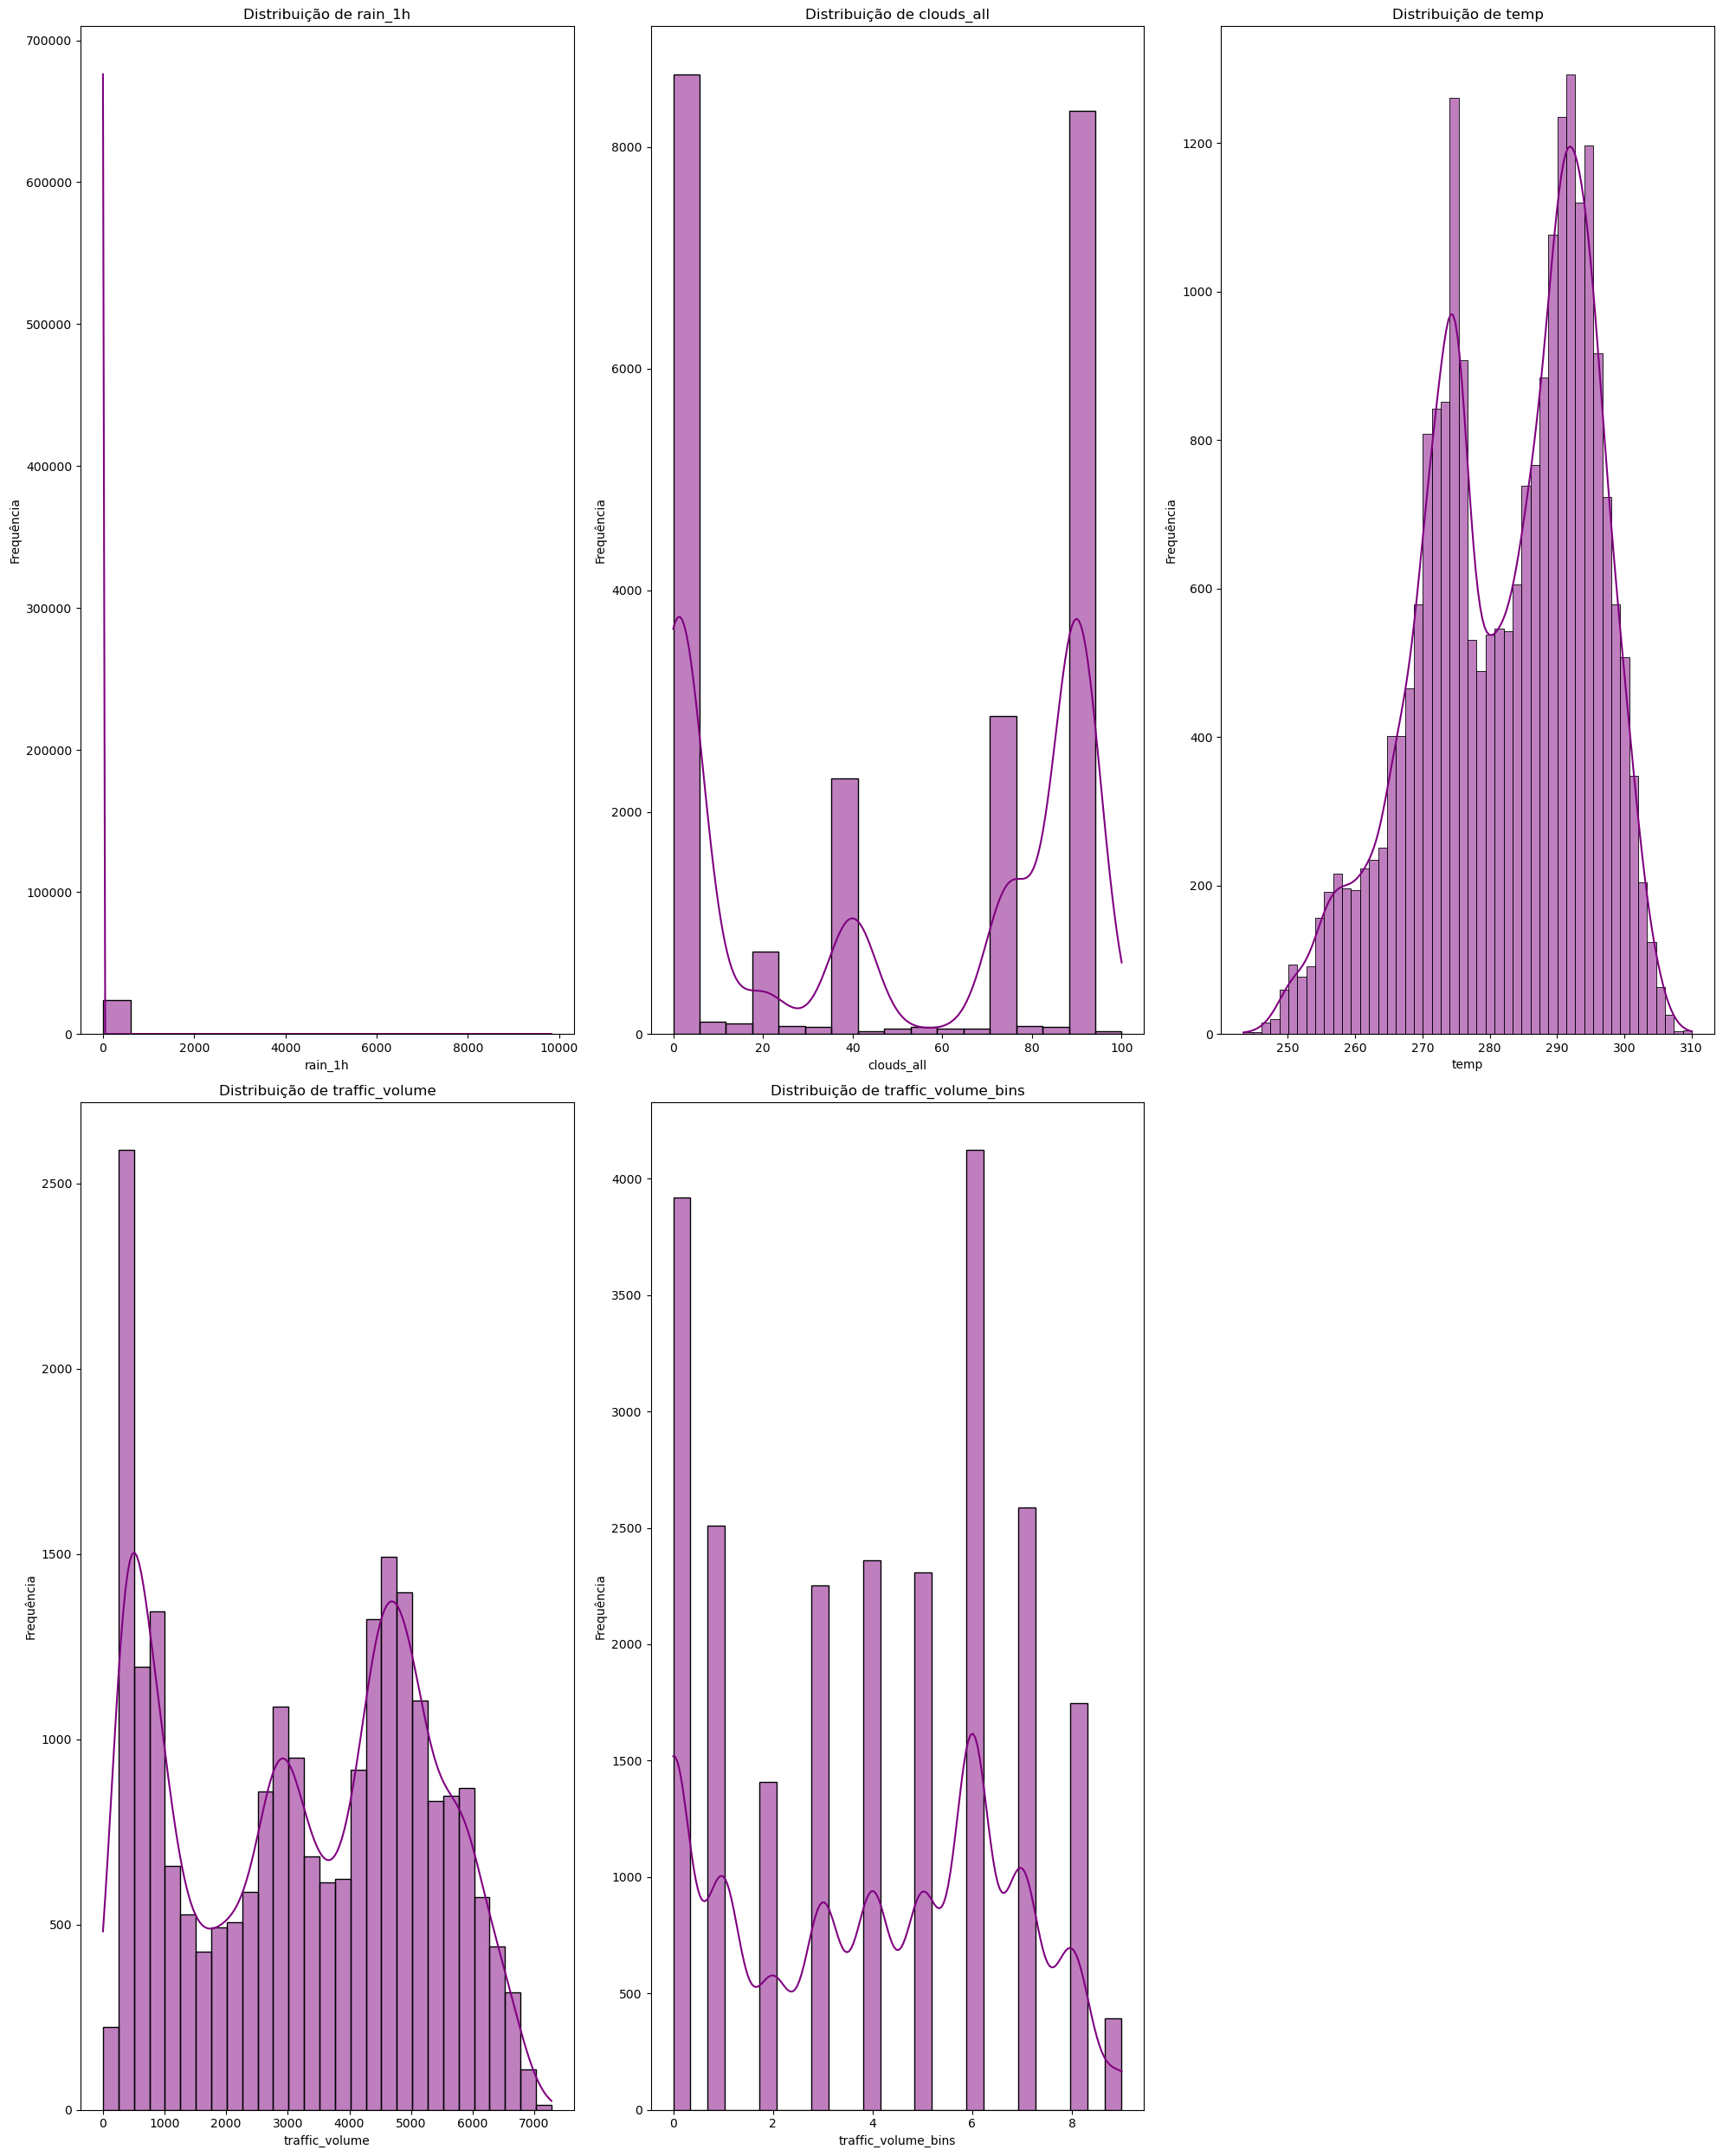

In [43]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='purple')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Através dos gráficos é possível concluir que:

rain_1h: A maioria das observações apresenta valores muito baixos ou zero para precipitação. Isto indica que a chuva é um evento raro no dataset.
Valores extremos foram tratados (limitados), mas permanecem poucos casos de chuva intensa.

clouds_all: A variável apresenta picos em valores extremos (0% e 100% de cobertura de nuvens), sugerindo que o céu frequentemente está totalmente claro ou encoberto.
A distribuição é dispersa nos valores intermediários.

temp: A temperatura (em Kelvin) apresenta dois picos claros, indicando uma possível sazonalidade (estações quentes e frias).

traffic_volume: Apresenta diferentes padrões ao longo do dia e da semana, com valores significativamente maiores nos horários de pico e dias úteis.

traffic_volume_bins: A análise em bins mostra que o volume de tráfego é mais frequente em valores baixos e médios. Isto reflete padrões esperados de tráfego, com períodos de alta concentração em horários específicos.
</div>

## 2.6 Atributos Categóricos

O *dataset* (df) apresenta o seguinte conjunto de atributos categóricos:

+ *date_time*
+ *holiday*
+ *weather_main*
+ *weather_description* 

Verificaram-se os tipos de dados das colunas após o tratamento.

In [45]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Existem", len(categorical_cols),"atributos categóricos:" , list(categorical_cols))

Existem 4 atributos categóricos: ['holiday', 'weather_main', 'weather_description', 'is_holiday']


A coluna date_time deixa de ser um atributo categórico e passa a ser datetime como convertido acima.

Plotaram-se gráficos para visualização dos dados.

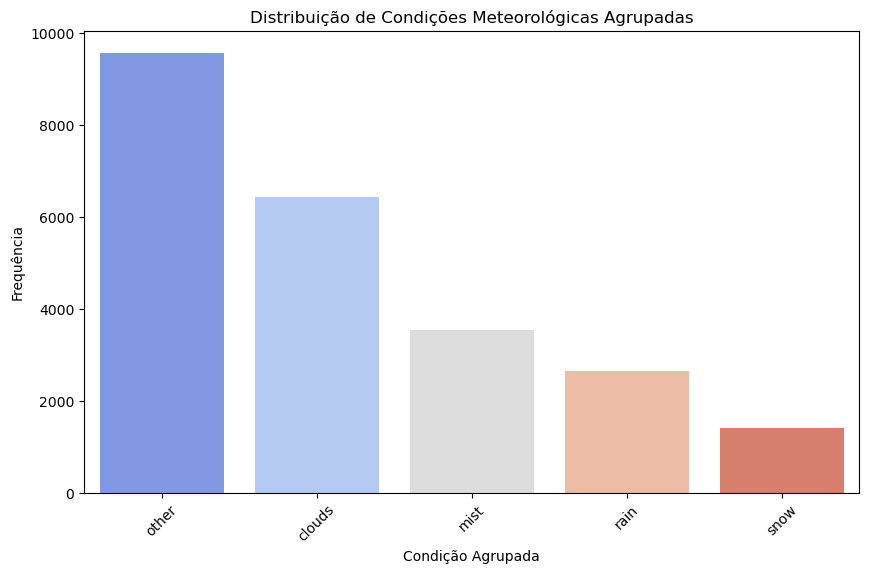

In [47]:
weather_mapping = {
    'light rain': 'rain',
    'moderate rain': 'rain',
    'heavy intensity rain': 'rain',
    'very heavy rain': 'rain',
    'light snow': 'snow',
    'snow': 'snow',
    'mist': 'mist',
    'fog': 'mist',
    'clear sky': 'clear',
    'few clouds': 'clouds',
    'scattered clouds': 'clouds',
    'broken clouds': 'clouds',
    'overcast clouds': 'clouds',
}
df['weather_grouped'] = df['weather_description'].map(weather_mapping).fillna('other')

# Visualização da nova coluna agrupada
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_grouped', palette='coolwarm', order=df['weather_grouped'].value_counts().index)
plt.title('Distribuição de Condições Meteorológicas Agrupadas')
plt.xlabel('Condição Agrupada')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
Por análise do gráfico pode-se concluir que:

    
other: Representa a maior parte das observações, indicando que muitas condições meteorológicas específicas não se enquadram em categorias principais ou são pouco frequentes.
    
clouds: A segunda maior categoria, o que sugere que condições nubladas são comuns no dataset.

mist: Representa uma parte considerável dos dados, indicando a relevância de condições com baixa visibilidade.

rain: A chuva está presente, mas em menor proporção em comparação às condições claras ou nubladas.

snow: A neve tem a menor frequência, mostrando que é uma condição meteorológica rara no conjunto de dados
</div>

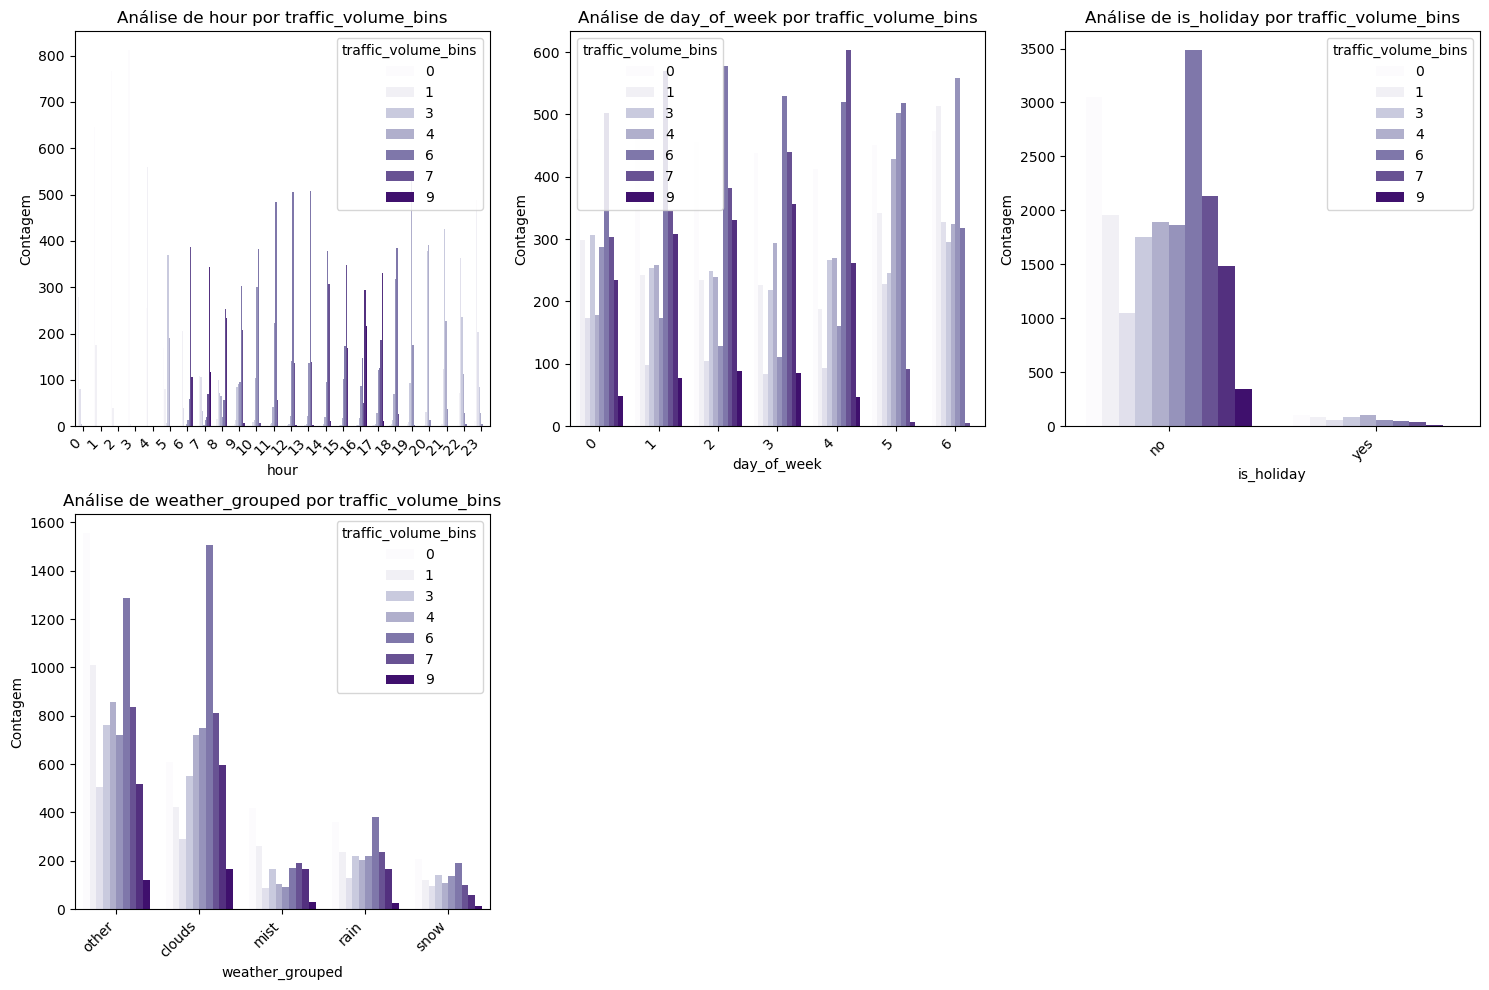

In [49]:
# Verificar e configurar índice como DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df['date_time'] = pd.to_datetime(df['date_time'])  # Converter para datetime
    df.set_index('date_time', inplace=True)  # Configurar índice como DatetimeIndex

# Remover duplicatas no índice
df = df[~df.index.duplicated(keep='first')]

# Criar colunas adicionais para períodos de tempo
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# Redefinir o índice para manter a coluna date_time no DataFrame
df.reset_index(inplace=True)

categorical_cols = ['hour', 'day_of_week', 'is_holiday', 'weather_grouped']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, hue='traffic_volume_bins', palette='Purples', dodge=True)
    plt.title(f'Análise de {col} por traffic_volume_bins')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

Com base nos gráficos, é possível concluir o seguinte sobre a variável traffic_volume em relação a outras variáveis categóricas:

hour: O tráfego apresenta picos evidentes durante os horários de pico, especialmente pela manhã (por volta das 7h-9h) e à tarde (por volta das 16h-18h).
Durante a madrugada, o volume de tráfego é muito baixo, como esperado.

day_of_week: O tráfego parece ser mais intenso nos dias úteis (segunda a sexta-feira), com redução considerável aos finais de semana.
A segunda-feira e a sexta-feira têm volumes mais altos, o que pode estar relacionado com o início e fim da semana de trabalho.

is_holiday: Em dias de feriados (yes), o volume de tráfego em bins altos (7-9) é consideravelmente menor em comparação com dias não feriados (no), indicando que as pessoas tendem a evitar deslocamentos nesses dias.

weather_grouped: A condição climática "clouds" tem maior frequência nos bins médios de tráfego, o que pode sugerir que essa condição não influencia drasticamente o tráfego.
Condições como "rain" e "snow" estão associadas a volumes de tráfego mais baixos, possivelmente devido à redução de deslocamentos em climas adversos.
</div>

**Análise**

Procedeu-se a uma análise mais detalhada, de forma a melhor compreender os dados.

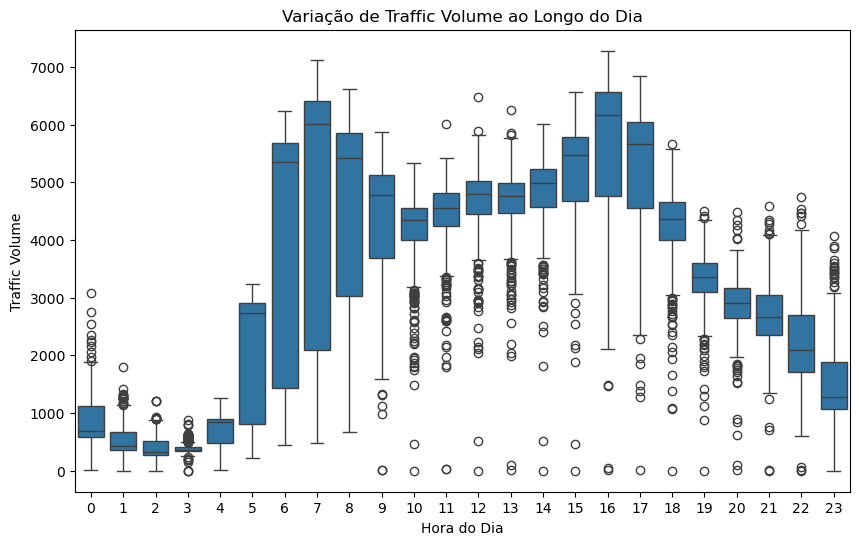

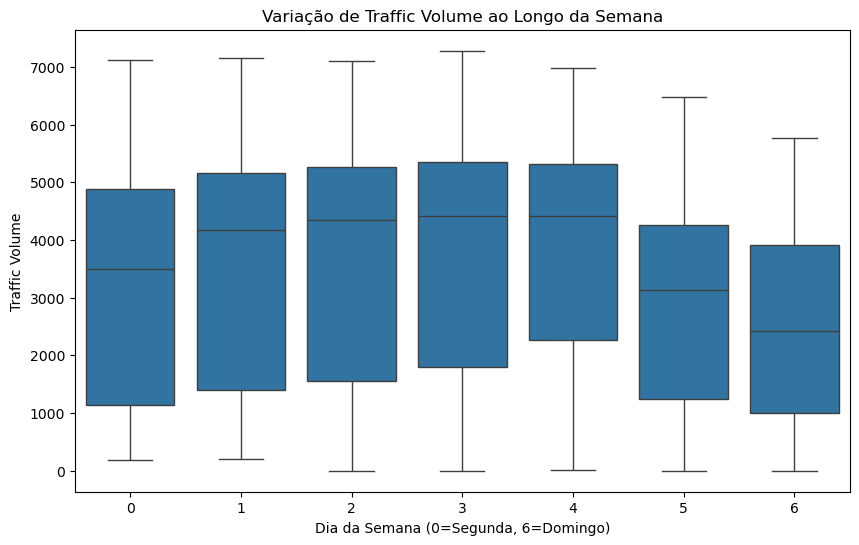

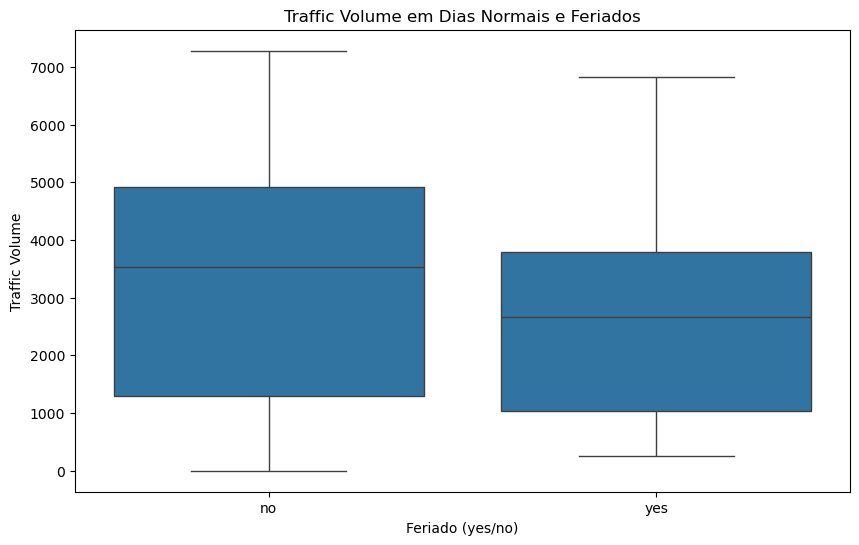

In [51]:
# Verificar e configurar índice como DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df['date_time'] = pd.to_datetime(df['date_time'])  # Converter para datetime
    df.set_index('date_time', inplace=True)  # Configurar índice como DatetimeIndex

# Criar colunas adicionais para períodos de tempo
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# Redefinir o índice para manter a coluna date_time
df.reset_index(inplace=True)

# Visualizar padrões de traffic_volume ao longo do dia
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='traffic_volume', data=df)
plt.title('Variação de Traffic Volume ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Traffic Volume')
plt.show()

# Padrões temporais: Variação de traffic_volume ao longo da semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='traffic_volume', data=df)
plt.title('Variação de Traffic Volume ao Longo da Semana')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Traffic Volume')
plt.show()

# Padrões temporais: Variação de traffic_volume em feriados 
if 'is_holiday' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_holiday', y='traffic_volume', data=df)
    plt.title('Traffic Volume em Dias Normais e Feriados')
    plt.xlabel('Feriado (yes/no)')
    plt.ylabel('Traffic Volume')
    plt.show()

<div class="alert alert-block alert-info">
    
Variação do Traffic Volume ao Longo do Dia (Primeiro Gráfico): O tráfego aumenta consideravelmente nas horas de pico, especialmente entre 7h e 9h da manhã e entre 16h e 18h à tarde. Estes picos refletem o movimento diário relacionado ao deslocamento para o trabalho e o retorno para casa.
Durante a noite e madrugada (entre 0h e 5h), o volume de tráfego é consideravelmente mais baixo.

Variação do Traffic Volume ao Longo da Semana (Segundo Gráfico): O tráfego parece ser consistentemente mais elevado durante os dias úteis (segunda a sexta-feira), com menor variabilidade. Aos finais de semana (sábado e domingo), observa-se uma redução no volume de tráfego, o que reflete o impacto do comportamento social e ausência de rotina de trabalho para muitas pessoas.

Traffic Volume em Dias Normais e Feriados (Terceiro Gráfico): O volume de tráfego em dias normais é significativamente maior em comparação aos feriados.
Nos feriados, há uma redução geral no tráfego, refletindo menos deslocamentos para trabalho e escola, mas ainda com alguma variabilidade devido a eventos específicos.
</div>

## 2.7 Matriz de correlação

Elaborou-se uma matriz de correlação para ajudar a identificar as relações entre variáveis, mostrando quais variáveis têm correlações fortes (positivas ou negativas).

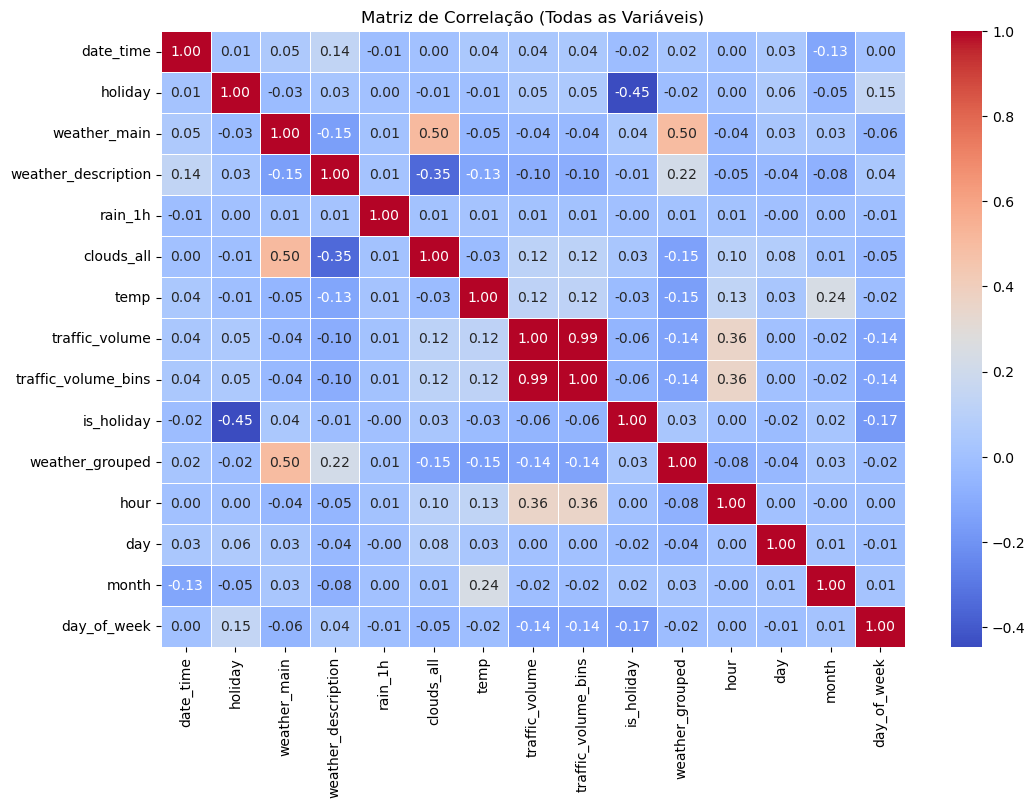

In [53]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o codificador
label_encoder = LabelEncoder()

# Aplicar o codificador nas colunas categóricas
df_encoded = df.copy()

# Aplicar a codificação para todas as colunas não numéricas
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Calcular a matriz de correlação para o dataset completo
correlation_matrix_all = df_encoded.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Todas as Variáveis)')
plt.show()


<div class="alert alert-block alert-info">
traffic_volume: Não apresenta uma correlação forte com nenhuma variável individual. A maior correlação positiva é com temp (~0.12), indicando que volumes de tráfego levemente mais altos podem estar associados a temperaturas mais altas. Correlação levemente negativa com rain_1h, sugerindo que o tráfego pode ser ligeiramente reduzido durante períodos de chuva.
    
clouds_all: Apresenta uma correlação forte com weather_main (~0.50), confirmando que os níveis de cobertura de nuvens estão diretamente relacionados com as condições meteorológicas gerais.

is_holiday: Mostra uma correlação negativa com holiday (-0.45), já que a maioria dos dias não é feriado, e feriados tendem a ser eventos raros.

temp: Correlação positiva com traffic_volume, mas modesta (~0.12). Nenhuma correlação significativa com outras variáveis climáticas, indicando que a temperatura não está fortemente influenciada por nuvens ou chuva no dataset.

weather_grouped: Relaciona-se bem com variáveis climáticas, como clouds_all (0.50) e weather_main (0.22), indicando que essas agrupações capturam bem o comportamento das condições meteorológicas.

Em resumo, não há correlações extremamente altas para o traffic_volume, indicando que múltiplas variáveis podem ter um impacto pequeno. A análise adicional deve ser focada em combinações de variáveis para identificar padrões mais complexos no tráfego.
</div>

## 2.8 Combinações de variáveis

traffic_volume e weather_grouped: Para observar o impacto das condições climáticas no volume de tráfego.

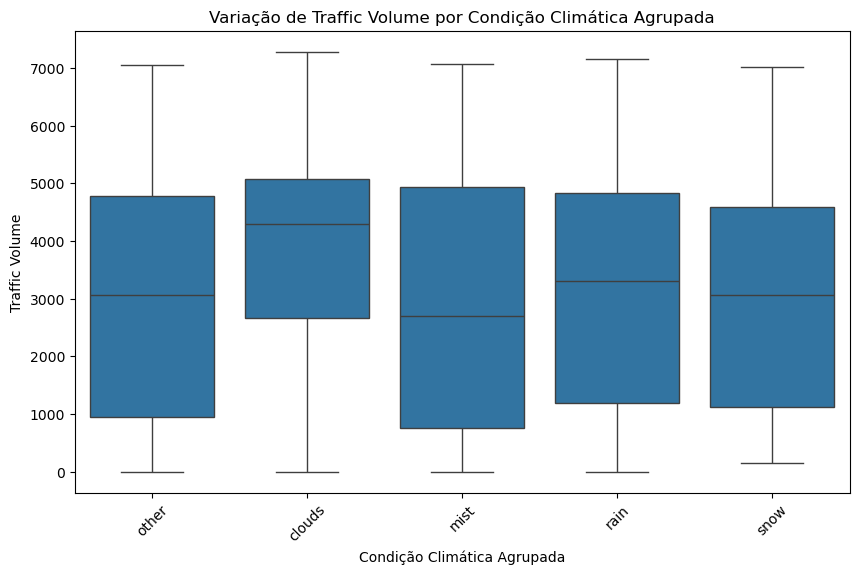

In [55]:
# Análise combinada de traffic_volume e weather_grouped
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_grouped', y='traffic_volume', data=df)
plt.title('Variação de Traffic Volume por Condição Climática Agrupada')
plt.xlabel('Condição Climática Agrupada')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
Por análise do gráfico pode-se concluir que dias nublados ("clouds") parecem estar associados a um maior volume de tráfego. Condições adversas como "mist", "rain" e "snow" não mostram impacto tão claro na mediana do tráfego, mas podem impactar outros aspectos como a dispersão dos dados.
</div>

clouds_all e weather_main: Verificar padrões entre cobertura de nuvens e a descrição geral do clima.

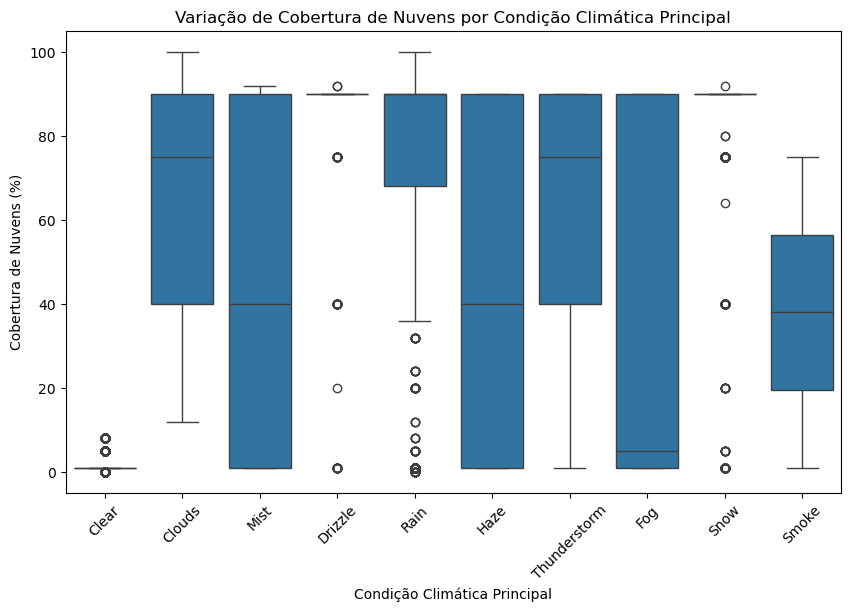

In [57]:
# Análise combinada de clouds_all e weather_main
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_main', y='clouds_all', data=df)
plt.title('Variação de Cobertura de Nuvens por Condição Climática Principal')
plt.xlabel('Condição Climática Principal')
plt.ylabel('Cobertura de Nuvens (%)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
A análise da variação da cobertura de nuvens por condições climáticas principais revela padrões distintos. Em condições de céu limpo, a cobertura de nuvens é quase inexistente, enquanto categorias como "clouds" e "thunderstorm" mostram alta cobertura (próxima de 100%). Condições como "rain" e "snow" também apresentam altos níveis de cobertura, mas com maior variação, indicando a influência de diferentes intensidades meteorológicas. Esta análise destaca como a cobertura de nuvens é altamente correlacionada a condições específicas, sendo útil para prever mudanças climáticas e o seu impacto em variáveis como o tráfego.
</div>

## 2.9 Outliers

Procedeu-se à identificação de outliers no dataset.

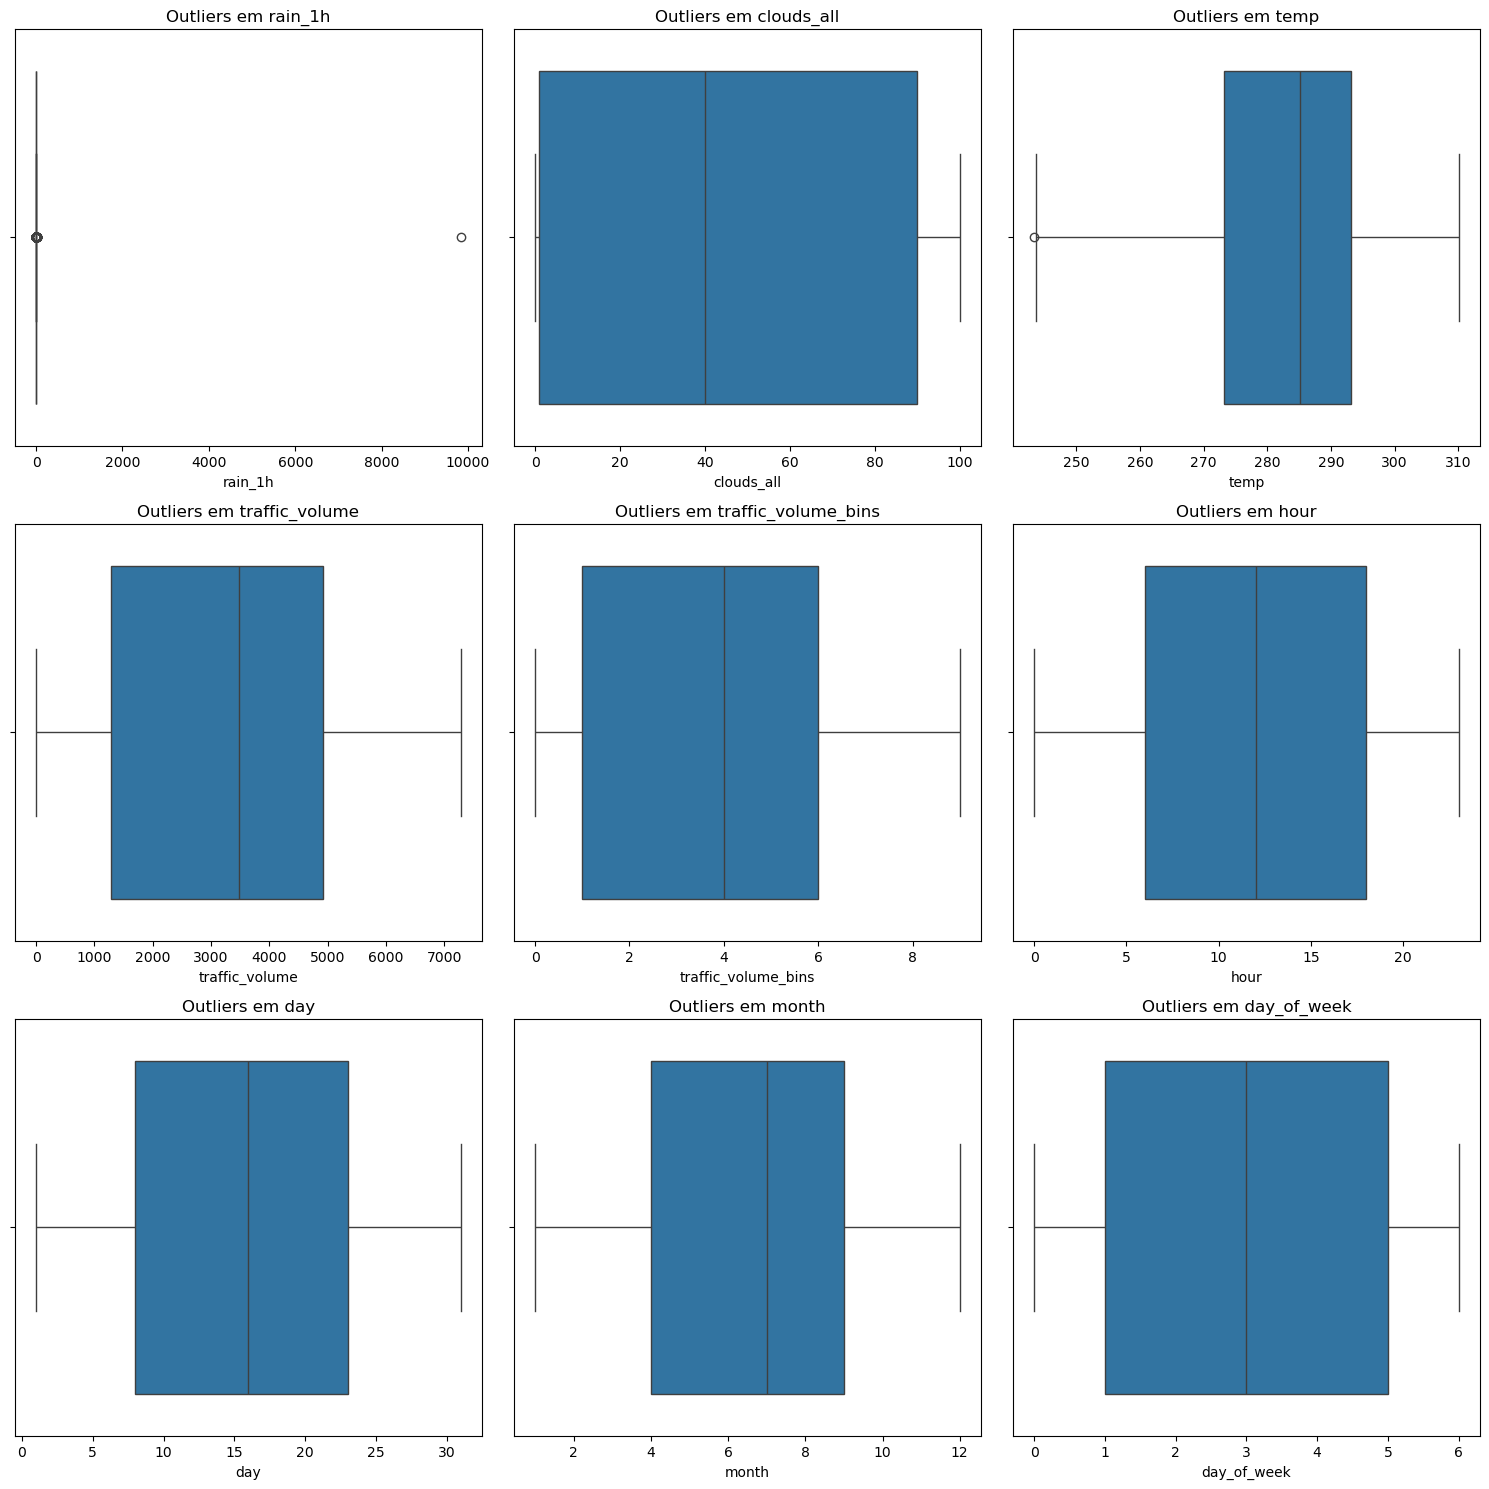

In [59]:
# Selecionar colunas numéricas, excluindo 'snow_1h'
numerical_cols = [col for col in df.columns if col not in ['date_time'] and df[col].dtype != 'object']

# Determinar o número de linhas e colunas para os subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calcula o número de linhas necessárias

# Criar os boxplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for i, var in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Outliers em {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
rain_1h: Existe uma presença clara de outliers com valores muito altos, indicando momentos de chuvas intensas. Isto reforça a importância do tratamento de outliers para evitar que eventos extremos influenciem desproporcionalmente as análises.

clouds_all: A variável "clouds_all" apresenta uma distribuição uniforme e não contém outliers evidentes. Isto sugere que a cobertura de nuvens é bem distribuída ao longo dos registos.

temp: A temperatura, embora concentrada dentro de um intervalo normal, não apresenta valores extremos significativos. Isto demonstra que não há ocorrências frequentes de temperaturas anormalmente altas ou baixas no dataset.

Traffic Volume: O volume de tráfego é bem comportado em relação a outliers, com a maioria dos valores dentro do intervalo esperado. Isto indica que o tráfego segue padrões regulares e previsíveis.

Hour, Day, and Weekday: Estas variáveis temporais não apresentam outliers, o que sugere que os valores estão dentro do intervalo esperado (e.g., horas entre 0 e 23, dias entre 1 e 31)
</div>

Limite máximo para rain_1h definido como: 1.41 mm


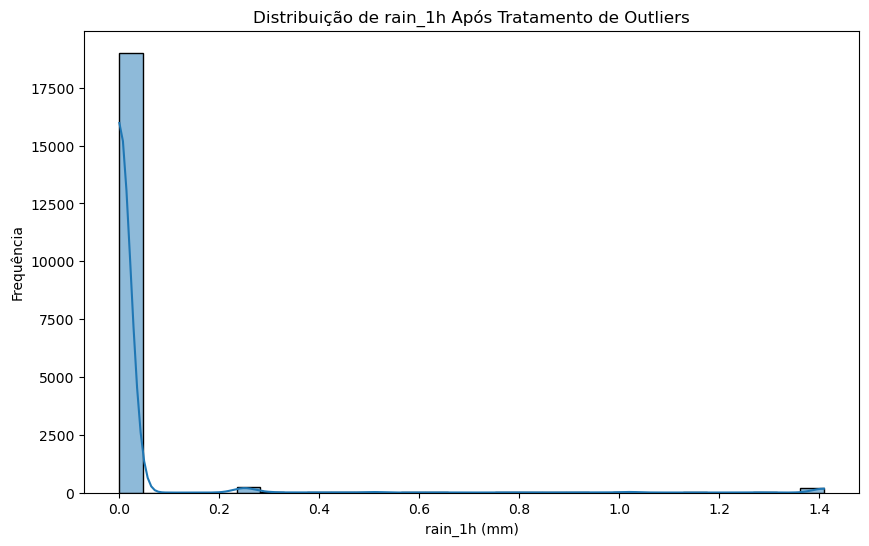

In [61]:
rain_max_threshold = df['rain_1h'].quantile(0.99)  # Usar o percentil 99 como limite
print(f"Limite máximo para rain_1h definido como: {rain_max_threshold:.2f} mm")
df['rain_1h'] = np.where(df['rain_1h'] > rain_max_threshold, rain_max_threshold, df['rain_1h'])

# Visualizar a distribuição após o tratamento
plt.figure(figsize=(10, 6))
sns.histplot(df['rain_1h'], bins=30, kde=True)
plt.title('Distribuição de rain_1h Após Tratamento de Outliers')
plt.xlabel('rain_1h (mm)')
plt.ylabel('Frequência')
plt.show()

<div class="alert alert-block alert-info">
O tratamento dos valores de rain_1h reduz o impacto de outliers extremos, preservando a distribuição geral dos dados. Isto melhora a qualidade das análises estatísticas e previne distorções em modelos preditivos.
</div>

## 3. Statistical models

Selecionou-se um subconjunto de 3000 dados.

In [63]:
# Selecionar 3000 linhas aleatórias
df_sample = df_encoded.sample(n=3000, random_state=42)

# Definir a coluna 'date_time' como índice
df_sample = df_sample.set_index('date_time')

# Garantir que o índice inclua data + hora
df_sample = df_sample.sort_index()

df_sample

,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume,traffic_volume_bins,is_holiday,weather_grouped,hour,day,month,day_of_week
date_time,,,,,,,,,,,,,,
2016-07-01 00:00:00,7,0,24,0.0,1,289.04,825,1,0,2,0,1,7,4
2016-07-01 03:00:00,7,0,24,0.0,1,285.39,406,0,0,2,3,1,7,4
2016-07-01 06:00:00,7,1,3,0.0,20,283.24,4826,6,0,0,6,1,7,4
2016-07-01 17:00:00,7,1,23,0.0,40,295.71,4307,5,0,0,17,1,7,4
2016-07-01 19:00:00,7,1,1,0.0,75,295.31,3102,4,0,0,19,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-29 23:00:00,7,1,18,0.0,90,280.32,3856,5,0,0,23,29,9,5
2018-09-30 01:00:00,7,1,18,0.0,90,280.19,920,1,0,0,1,30,9,6
2018-09-30 12:00:00,7,1,1,0.0,75,282.69,4429,6,0,0,12,30,9,6


Converteu-se a temperatura para Celsius.

In [65]:
df_sample['temp_celsius'] = df_sample['temp'] - 273.15

Definiu-se inicialmente a frequência para 5 dias de forma a melhorar a visibilidade da série graficamente.

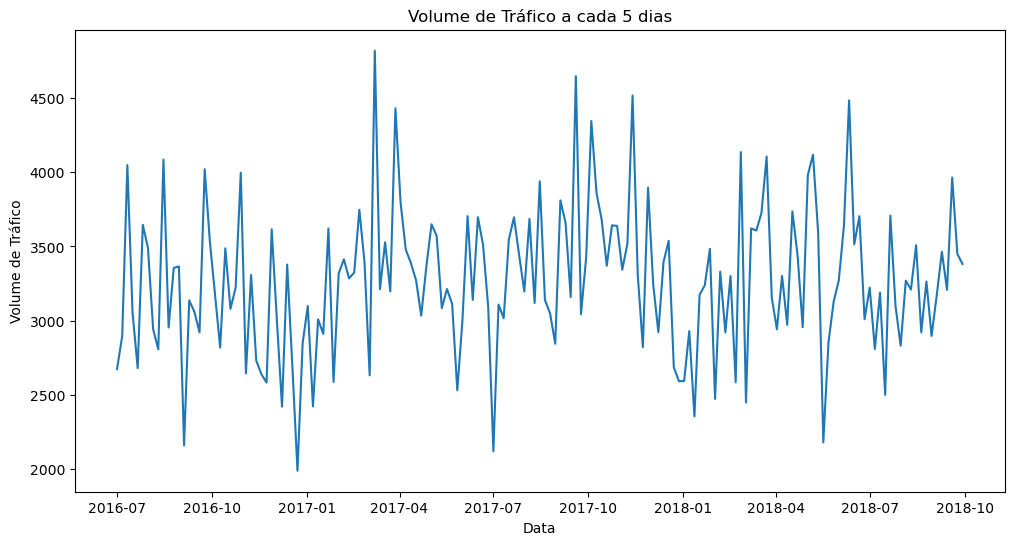

In [67]:
D_traffic = df_sample['traffic_volume'].resample('5D').mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(D_traffic)
plt.title('Volume de Tráfico a cada 5 dias')
plt.xlabel('Data')
plt.ylabel('Volume de Tráfico')
plt.show()

Para avaliar a série temporal de forma detalhada, decompôs-se a série pelos seus componentes principais: tendência, sazonalidade, e resíduos.

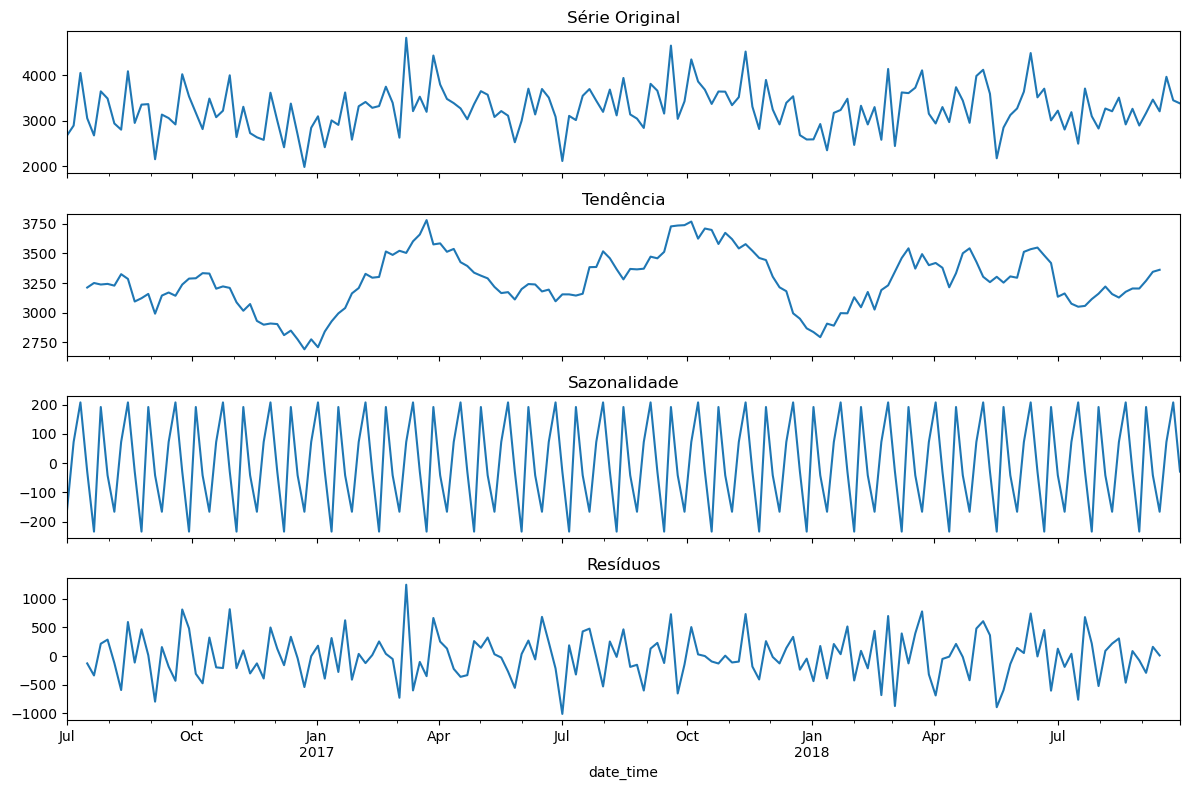

In [69]:
# Decomposição da série
decomposition = seasonal_decompose(D_traffic, model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], title='Série Original')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Resíduos')

plt.tight_layout()
plt.show()


Definiu-se a frequência a utilizar nos modelos (Hora)

In [71]:
#Definir freq por hora
df_sample = df_sample.resample('h').mean()
df_sample = df_sample.ffill()

print(df_sample)

                     holiday  weather_main  weather_description  rain_1h  \
date_time                                                                  
2016-07-01 00:00:00      7.0           0.0                 24.0      0.0   
2016-07-01 01:00:00      7.0           0.0                 24.0      0.0   
2016-07-01 02:00:00      7.0           0.0                 24.0      0.0   
2016-07-01 03:00:00      7.0           0.0                 24.0      0.0   
2016-07-01 04:00:00      7.0           0.0                 24.0      0.0   
...                      ...           ...                  ...      ...   
2018-09-30 18:00:00      7.0           1.0                  1.0      0.0   
2018-09-30 19:00:00      7.0           1.0                  1.0      0.0   
2018-09-30 20:00:00      7.0           1.0                  1.0      0.0   
2018-09-30 21:00:00      7.0           1.0                  1.0      0.0   
2018-09-30 22:00:00      7.0           1.0                 18.0      0.0   

           

Dividiu-se o dataset em 80% para treino e 20% para teste

In [73]:
# Calcular o índice para 80% dos dados
train_size = int(len(df_sample) * 0.8)

# Dividir apenas a coluna 'traffic_volume' em treino e teste
train = df_sample['traffic_volume'].iloc[:train_size]  
test = df_sample['traffic_volume'].iloc[train_size:]

print(f'Quantidade de amostras no treino: {len(train)}')
print(f'Quantidade de amostras no teste: {len(test)}')

Quantidade de amostras no treino: 15781
Quantidade de amostras no teste: 3946


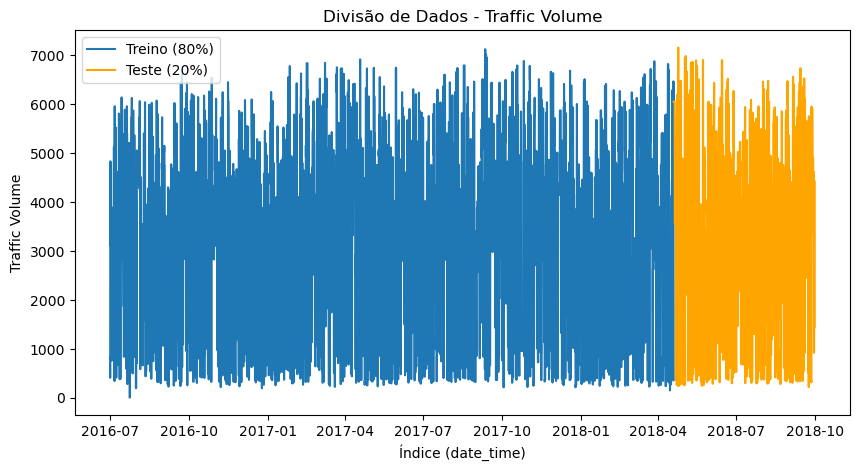

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(train, label='Treino (80%)')
plt.plot(test, label='Teste (20%)', color='orange')
plt.legend()
plt.title('Divisão de Dados - Traffic Volume')
plt.xlabel('Índice (date_time)')
plt.ylabel('Traffic Volume')
plt.show()

Após efetuar o teste de Augmented Dickey–Fuller, verificou-se que a série é estacionária.

In [77]:
result = adfuller(train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("A série de treino é estacionária")
else:
    print("A série de treino não é estacionária")

ADF Statistic: -15.16766968052878
p-value: 6.456910749772885e-28
A série de treino é estacionária


Gerou-se os gráficos que representam a ACF (Autocorrelação) e a PACF (Autocorrelação Parcial) da série temporal para ajudar a identificar a estrutura da série

<div class="alert alert-block alert-info">
O gráfico ACF (Autocorrelação) mostra a relação linear entre a série atual e os seus lags em diferentes intervalos. Os picos que aparecem fora da região sombreada (intervalo de confiança) indicam os lags com correlação significativa. No gráfico, observou-se que a correlação decresce gradualmente, o que sugere que a série é influenciada por muitos lags, o que aponta para a presença de um componente de média móvel (MA). Além disso, há um padrão ondulatório após o lag 24, o que pode indicar a existência de sazonalidade com periodicidade de 24.

O gráfico PACF (Autocorrelação Parcial) mostra a relação entre a série atual e os seus lags, o que elimina o efeito intermediário dos lags anteriores. Picos significativos no gráfico indicam a ordem do componente autoregressivo (AR). No gráfico apresentado, observou-se que o primeiro lag (lag 1) é altamente significativo, enquanto, após o lag 1, os valores decrescem rapidamente, o que indica que a influência direta de lags adicionais é mínima.
</div>

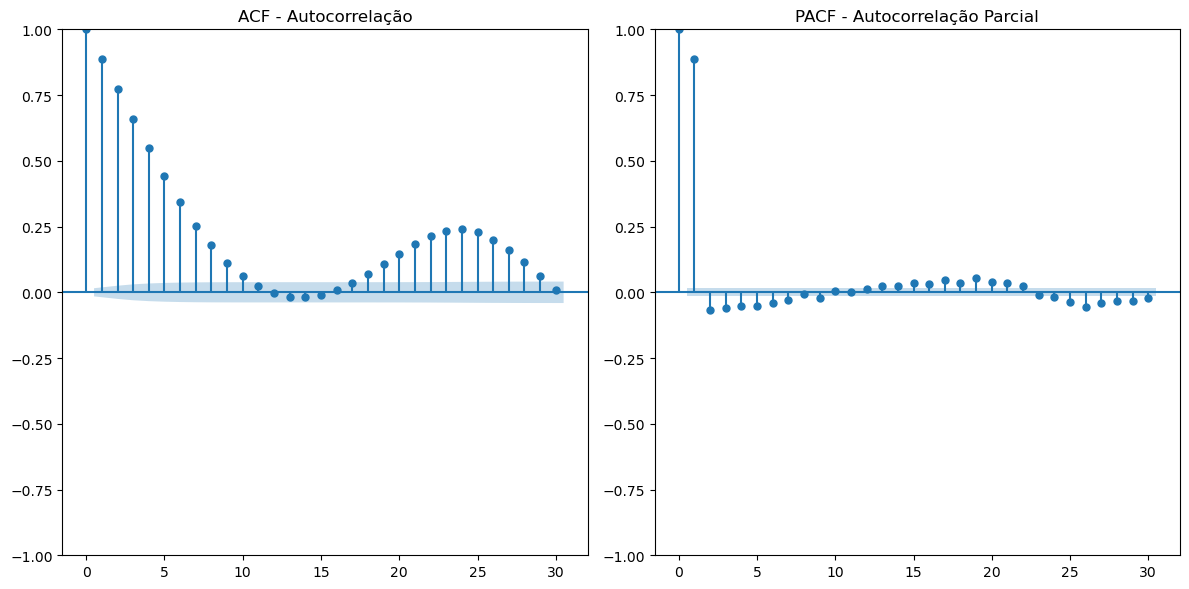

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ACF e PACF
plot_acf(train, ax=axes[0], lags=30, title='ACF - Autocorrelação')
plot_pacf(train, ax=axes[1], lags=30, title='PACF - Autocorrelação Parcial')

plt.tight_layout()
plt.show()

Aplicou-se o modelo ARMA otimizado.

In [289]:
def optimize_ARMA(train, order_list) -> pd.DataFrame:
    results = []
    for order in order_list:
        try:
            print(f"A testar modelo ARMA({order[0]}, {order[1]})")
            model = SARIMAX(train, order=(order[0], 0, order[1]), simple_differencing=False)
            model_fit = model.fit(disp=False) 
            aic = model_fit.aic 
            results.append([order, aic])
        except Exception as e:
            print(f"Erro no modelo ARMA({order[0]}, {order[1]}): {e}")
            continue
            
    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

# Definir a lista de combinações de (p, q) a serem testadas
order_list = [(p, q) for p in range(0, 4) for q in range(0, 4)]


<div class="alert alert-block alert-info">
Com base nos resultados apresentados, com diferentes combinações de parâmetros (p,q) para o modelo ARMA e os respetivos valores de AIC (Akaike Information Criterion), é possível concluir que o modelo com os menores valores de AIC é o ARMA(2, 3), com um AIC de 258825.805138.
</div>

In [291]:
result_df = optimize_ARMA(train, order_list)
print(result_df)

A testar modelo ARMA(0, 0)
A testar modelo ARMA(0, 1)
A testar modelo ARMA(0, 2)
A testar modelo ARMA(0, 3)
A testar modelo ARMA(1, 0)
A testar modelo ARMA(1, 1)
A testar modelo ARMA(1, 2)
A testar modelo ARMA(1, 3)
A testar modelo ARMA(2, 0)
A testar modelo ARMA(2, 1)
A testar modelo ARMA(2, 2)
A testar modelo ARMA(2, 3)
A testar modelo ARMA(3, 0)
A testar modelo ARMA(3, 1)
A testar modelo ARMA(3, 2)
A testar modelo ARMA(3, 3)
     (p,q)            AIC
0   (2, 3)  258825.805138
1   (2, 1)  258940.550645
2   (1, 2)  259618.379817
3   (3, 0)  259618.387714
4   (1, 3)  259619.203232
5   (3, 3)  259619.762621
6   (2, 0)  259619.828506
7   (1, 1)  259620.006496
8   (2, 2)  259620.074058
9   (3, 1)  259622.291054
10  (1, 0)  259623.836052
11  (3, 2)  259631.396827
12  (0, 3)  272309.136588
13  (0, 2)  278160.856808
14  (0, 1)  287900.286429
15  (0, 0)  304769.537051


                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                15752
Model:               SARIMAX(2, 0, 3)   Log Likelihood             -129406.903
Date:                Sat, 21 Dec 2024   AIC                         258825.805
Time:                        13:34:43   BIC                         258871.793
Sample:                    07-02-2016   HQIC                        258841.027
                         - 04-19-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8573   1.79e-05   1.04e+05      0.000       1.857       1.857
ar.L2         -0.8573   1.76e-05  -4.86e+04      0.000      -0.857      -0.857
ma.L1         -0.9223      0.020    -45.629      0.0

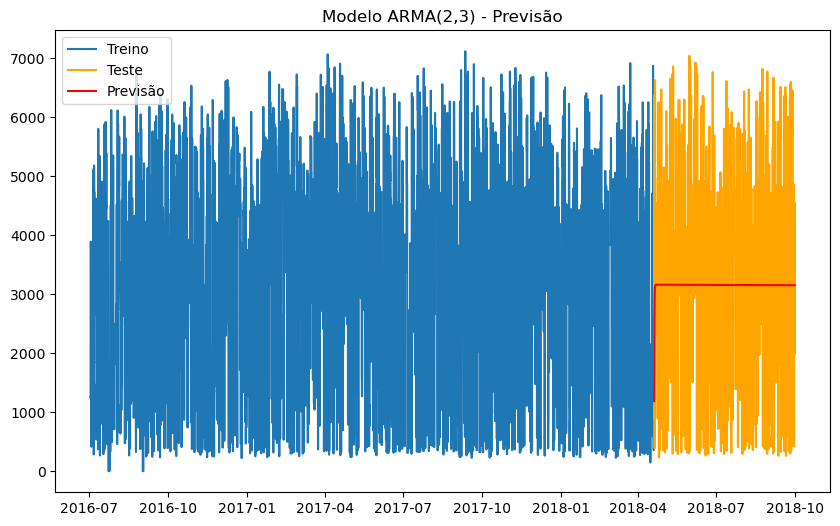

In [292]:
# Ajustar o modelo ARMA(2,3)
model = SARIMAX(train, order=(2, 0, 3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Teste', color='orange')
plt.plot(test.index, forecast, label='Previsão', color='red')
plt.legend()
plt.title("Modelo ARMA(2,3) - Previsão")
plt.show()

Avaliou-se se os resíduos do modelo ajustado têm autocorrelação significativa.

Conclui-se que, embora a média dos valores-p seja superior a 0.05, o valor mínimo (1.61e-17) indica que há autocorrelação significativa em pelo menos um dos lags testados. Isso significa que o modelo ARMA pode não ter captado completamente todos os padrões presentes na série temporal.

In [293]:
residuals = model_fit.resid

residuals_test = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1), return_df=True)

print(residuals_test['lb_pvalue'].describe())


count    1.000000e+01
mean     1.630890e-01
std      3.443973e-01
min      1.615607e-17
25%      1.155878e-09
50%      5.467613e-09
75%      1.601679e-08
max      8.576666e-01
Name: lb_pvalue, dtype: float64


Como o modelo ARMA pode não ter captado completamente todos os padrões, realizou-se o modelo SARIMA.

In [ ]:
def optimize_SARIMA(train, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    results = []
    for order in product(p_values, d_values, q_values):  # Não sazonais
        for seasonal_order in product(P_values, D_values, Q_values, [m]):  # Sazonais
            try:
                # Ajustar o modelo SARIMA
                model = SARIMAX(train, 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                simple_differencing=False)
                model_fit = model.fit(disp=False)
                aic = model_fit.aic
                results.append([order, seasonal_order, aic])
                print(f"A testar SARIMA{order}{seasonal_order} - AIC:{aic}")
            except Exception as e:
                print(f"Erro com SARIMA{order}{seasonal_order}: {e}")
                continue
                
    # Ordenar resultados pelo menor AIC
    result_df = pd.DataFrame(results, columns=['Order', 'Seasonal_Order', 'AIC'])
    result_df = result_df.sort_values(by='AIC').reset_index(drop=True)
    return result_df

# Definir os intervalos de parâmetros
p_values = range(0, 2)   # Ordem AR não sazonal
d_values = range(0, 2)   # Diferenciação não sazonal
q_values = range(0, 2)   # Ordem MA não sazonal
P_values = range(0, 2)   # Ordem AR sazonal
D_values = range(0, 2)   # Diferenciação sazonal
Q_values = range(0, 2)   # Ordem MA sazonal
m = 24                  # Periodicidade sazonal

# Executar a otimização
print("Otimização SARIMA...")
results = optimize_SARIMA(train, p_values, d_values, q_values, P_values, D_values, Q_values, m)

# Exibir os melhores modelos
print("\nTop 5 modelos SARIMA com menor AIC:")
print(results.head())


Otimização SARIMA...
A testar SARIMA(0, 0, 0)(0, 0, 0, 24) - AIC:304972.30814805557
A testar SARIMA(0, 0, 0)(0, 0, 1, 24) - AIC:297306.0356820061
A testar SARIMA(0, 0, 0)(0, 1, 0, 24) - AIC:290028.5330196726
A testar SARIMA(0, 0, 0)(0, 1, 1, 24) - AIC:280426.81661000306
A testar SARIMA(0, 0, 0)(1, 0, 0, 24) - AIC:288842.3572490158
A testar SARIMA(0, 0, 0)(1, 0, 1, 24) - AIC:282190.92340468056
A testar SARIMA(0, 0, 0)(1, 1, 0, 24) - AIC:286296.92806472303


In [ ]:
# Selecionar o melhor modelo
best_order = results.iloc[0]['Order']
best_seasonal_order = results.iloc[0]['Seasonal_Order']

print(f"Melhor modelo: SARIMA{best_order}{best_seasonal_order}")

# Ajustar o modelo
best_model = SARIMAX(train, 
                     order=best_order, 
                     seasonal_order=best_seasonal_order, 
                     simple_differencing=False)

best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())


In [ ]:
# Plotar ACF dos resíduos
residuals = best_model_fit.resid
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title("ACF dos Resíduos")
plt.show()

# Teste de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=np.arange(1, 11), return_df=True)
print("Teste de Ljung-Box:")
print(ljung_box_test)


In [ ]:
# Gerar previsões
forecast = final_model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE do melhor modelo: {rmse}")


se nao der - usar (2, 0, 3, 24)

In [ ]:
# Ajustar o modelo SARIMA com os parâmetros definidos
model_sarima = SARIMAX(train, 
                       order=(2, 0, 3),  # Parâmetros não sazonais (p, d, q)
                       seasonal_order=(2, 0, 3, 24),  # Parâmetros sazonais (P, D, Q, m)
                       simple_differencing=False)

# Treinar o modelo
model_fit_sarima = model_sarima.fit(disp=False)

# Resumo do modelo
print(model_fit_sarima.summary())

# Avaliar resíduos
residuals = model_fit_sarima.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Resíduos do Modelo SARIMA(2, 0, 3)(2, 0, 3, 24)")
plt.grid()
plt.show()

# ACF dos resíduos
plot_acf(residuals, lags=30)
plt.title("ACF dos Resíduos")
plt.show()

# Previsão para os próximos passos
forecast_steps = 10
forecast = model_fit_sarima.forecast(steps=forecast_steps)
print(f"Previsões para os próximos {forecast_steps} passos:")
print(forecast)


## 4. Machine learning models

Dividiu-se o dataset em 80% para treino e 20% para teste

In [56]:
train_size = int(len(df_encoded) * 0.80)
train_ml, test_ml = df_encoded[:train_size], df_encoded[train_size:]
print(f"Tamanho do conjunto de treino: {len(train_ml)}, teste: {len(test_ml)}")

Tamanho do conjunto de treino: 18885, teste: 4722


Criou-se janelas deslizantes para preparar os dados

In [58]:
def create_sliding_window(df_encoded, n_steps, m_steps):
    X, y = [], []
    for i in range(len(df_encoded) - n_steps - m_steps + 1):
        X.append(df_encoded[i:i+n_steps])
        y.append(df_encoded[i+n_steps:i+n_steps+m_steps])
    return np.array(X), np.array(y)


In [60]:
n_steps = 6  
m_steps = 1  

X, y = create_sliding_window(df_encoded['traffic_volume'].values, n_steps, m_steps)
y = y.ravel()

Os dados de entrada e saída (X e y) foram divididos em conjuntos de treino e teste. De seguida, as entradas (X) foram escalonadas utilizando o StandardScaler para melhorar o desempenho dos modelos. Cada regressor foi treinado com os dados de treino e avaliado no conjunto de teste utilizando métricas como MAE, MSE e MAPE. O modelo com o menor MAE foi identificado como o melhor modelo e utilizado para prever os dados de teste. Por fim, as previsões do melhor modelo foram comparadas aos valores reais num gráfico para análise visual.

<div class="alert alert-block alert-info">
Com base nos resultados, concluiu-se que o modelo Random Forest é o mais adequado para prever o volume de tráfego, pois apresenta os menores valores de erro, com MAE de 253.5581, MSE de 143766.0925 e MAPE de 21.13%. O Gradient Boosting é a segunda melhor opção, com MAE de 307.0688, MSE de 187867.2712 e MAPE de 26.27%, seguido de perto pelo KNeighbors Regressor, que também demonstrou um desempenho competitivo com MAE de 259.5372, MSE de 155137.4056 e MAPE de 21.24%. Por outro lado, os modelos Support Vector Regression (SVR) e Linear Regression apresentaram os piores desempenhos, com erros significativamente mais altos, sendo o MAE de 677.5384 e 432.8525, respetivamente, e MAPE acima de 47% no caso da regressão linear e 114% no caso do SVR. Assim, o Random Forest destaca-se como o modelo mais eficiente, enquanto Gradient Boosting e KNeighbors Regressor podem ser considerados alternativas.Já os modelos SVR e Linear Regression não são recomendados para o problema em estudo
</div>

Random Forest - MAE: 253.5581, MSE: 143766.0925, MAPE: 0.2113
Gradient Boosting - MAE: 307.0688, MSE: 187867.2712, MAPE: 0.2627
Decision Tree - MAE: 335.5363, MSE: 297059.5469, MAPE: 0.2851
KNeighbors Regressor - MAE: 259.5372, MSE: 155137.4056, MAPE: 0.2124
Support Vector Regression (SVR) - MAE: 677.5384, MSE: 785317.5997, MAPE: 1.1462
Linear Regression - MAE: 432.8525, MSE: 355067.3613, MAPE: 0.4764

Resultados de Avaliação:
                             Model         MAE            MSE      MAPE
0                    Random Forest  253.558066  143766.092494  0.211341
1                Gradient Boosting  307.068804  187867.271183  0.262680
2                    Decision Tree  335.536327  297059.546918  0.285082
3             KNeighbors Regressor  259.537174  155137.405575  0.212403
4  Support Vector Regression (SVR)  677.538380  785317.599652  1.146245
5                Linear Regression  432.852453  355067.361276  0.476433


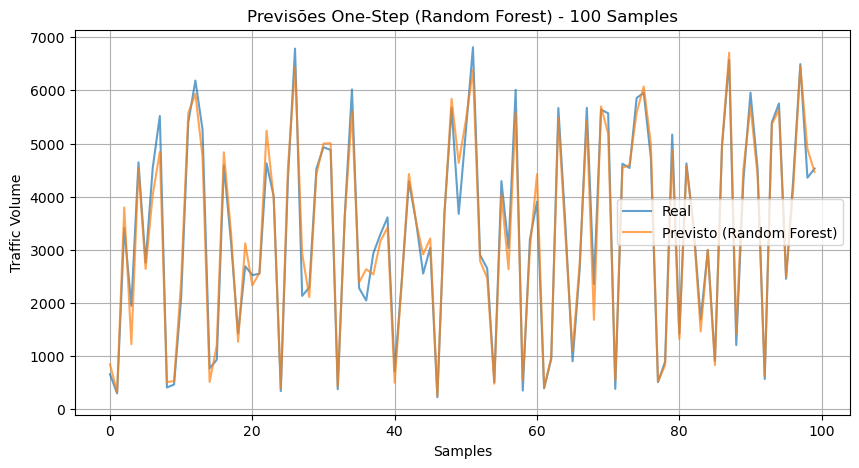

In [62]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Lista de algoritmos de regressão
regressors = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Linear Regression': LinearRegression()
}

# Avaliação dos modelos
results = []
for name, model in regressors.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'MAPE': mape})
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}")

results_df = pd.DataFrame(results)
print("\nResultados de Avaliação:")
print(results_df)

best_model_name = results_df.loc[results_df['MAE'].idxmin(), 'Model']
best_model = regressors[best_model_name]
y_pred_best = best_model.predict(X_test)

num_samples = 100
plt.figure(figsize=(10, 5))
plt.plot(y_test[:num_samples], label='Real', alpha=0.7)
plt.plot(y_pred_best[:num_samples], label=f'Previsto ({best_model_name})', alpha=0.7)
plt.legend()
plt.title(f"Previsões One-Step ({best_model_name}) - {num_samples} Samples")
plt.xlabel('Samples')
plt.ylabel('Traffic Volume')
plt.grid()
plt.show()


Realizou-se uma previsão multi-step (3 passos) utilizando o modelo Random Forest. Inicialmente, foram criadas janelas deslizantes para dividir os dados em entradas e saídas correspondentes às previsões de múltiplos passos. De seguida, os dados foram divididos em conjuntos de treino e teste. O modelo Random Forest Regressor foi treinado com o conjunto de treino e utilizado para prever os valores do conjunto de teste. As métricas MAE, MSE e MAPE foram calculadas para avaliar o desempenho do modelo. Por fim, foram gerados gráficos que comparam os valores reais e previstos para cada um dos 3 passos futuros, permitindo uma análise visual da precisão das previsões.

<div class="alert alert-block alert-info">
Com base nos gráficos e nas métricas para a previsão multi-step (3 passos) utilizando o modelo Random Forest, concluiu-se que o modelo tem bom desempenho no primeiro passo (Step 1), com previsões bem alinhadas aos valores reais, conforme indicado pelo MAE de 358.0930, MSE de 324209.2716 e MAPE de 31.18%. No segundo passo (Step 2), observa-se um leve aumento no desvio entre os valores reais e previstos, o que indica uma diminuição da precisão. No terceiro passo (Step 3), as divergências tornam-se mais evidentes, com flutuações mais marcantes entre as previsões e os valores reais, algo esperado devido ao aumento da incerteza com o avanço do horizonte de previsão. O modelo consegue capturar bem a dinâmica geral da série temporal nos passos iniciais, mas sua precisão diminui à medida que o horizonte de previsão aumenta. Assim, o modelo é eficiente para previsões de curto prazo, especialmente no primeiro passo, mas estratégias alternativas podem ser necessárias para melhorar a precisão em passos futuros.
</div>


Métricas para Multi-Step Forecasting:
MAE: 358.0930, MSE: 324209.2716, MAPE: 0.3118


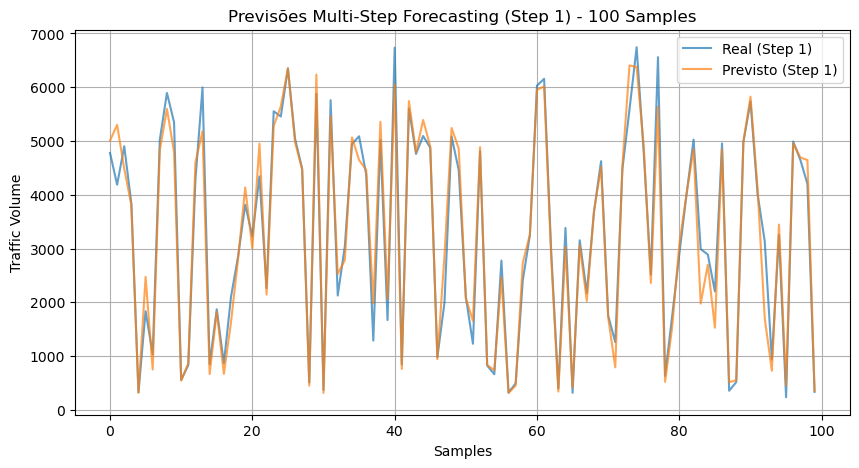

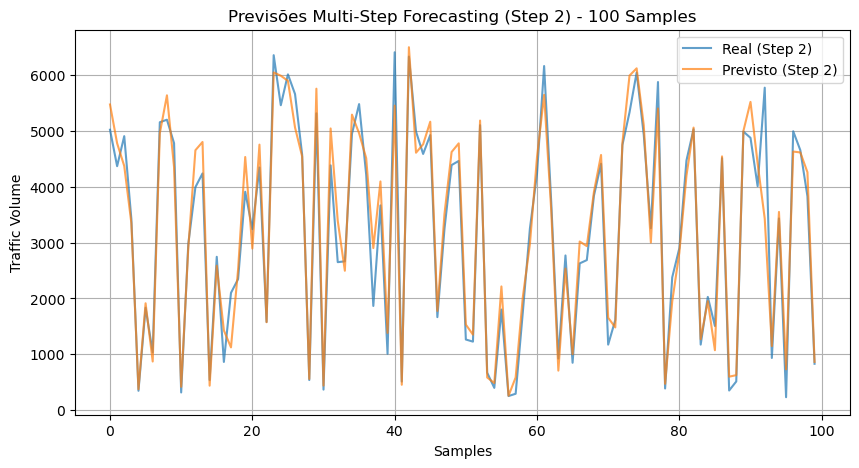

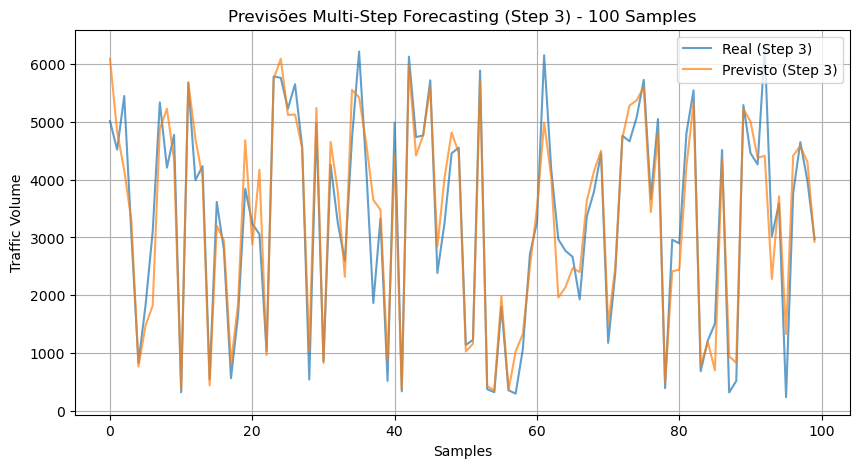

In [63]:
#Multi-step
m_steps_multi_step = 3  

# Criar janelas deslizantes para multi-step forecasting
X_multi_step, y_multi_step = create_sliding_window(df_encoded['traffic_volume'].values, n_steps, m_steps_multi_step)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_step, y_multi_step, test_size=0.2, random_state=42)

# Verificar e tratar valores NaN em y_train_multi
if np.isnan(y_train_multi).any():
    y_train_multi = np.nan_to_num(y_train_multi, nan=np.nanmean(y_train_multi))

model = RandomForestRegressor(random_state=42)
model.fit(X_train_multi, y_train_multi)

y_pred_multi_step = model.predict(X_test_multi)

mae_multi_step = mean_absolute_error(y_test_multi, y_pred_multi_step)
mse_multi_step = mean_squared_error(y_test_multi, y_pred_multi_step)
mape_multi_step = mean_absolute_percentage_error(y_test_multi, y_pred_multi_step)

print("\nMétricas para Multi-Step Forecasting:")
print(f"MAE: {mae_multi_step:.4f}, MSE: {mse_multi_step:.4f}, MAPE: {mape_multi_step:.4f}")

num_samples = 100

for step in range(m_steps_multi_step):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_multi[:num_samples, step], label=f"Real (Step {step + 1})", alpha=0.7)
    plt.plot(y_pred_multi_step[:num_samples, step], label=f"Previsto (Step {step + 1})", alpha=0.7)
    plt.legend()
    plt.title(f"Previsões Multi-Step Forecasting (Step {step + 1}) - {num_samples} Samples")
    plt.xlabel("Samples")
    plt.ylabel("Traffic Volume")
    plt.grid()
    plt.show()



## 5. Modelos de Deep Learning

Criou-se janelas deslizantes para a série temporal de temperatura, utilizando 6 valores consecutivos (n=6) como entrada (X) e 1 valor futuro (
m=1) como saída (y). A função slideWindow foi responsável por dividir a série nesses pares, preparando os dados para aplicações de previsão. Antes da criação das janelas, verificou-se se a série era suficientemente longa para os parâmetros definidos (n+m) e, após o processamento, confirmou-se que os dados foram gerados corretamente.

In [189]:
def slideWindow(series, n, m):
    X, y = [], []
    for i in range(len(series) - n - m + 1):
        X.append(series[i:i+n])
        y.append(series[i+n:i+n+m])
    return np.array(X), np.array(y)

# Dados a serem usados: temperatura
series = df_sample['traffic_volume'].dropna().values

# Criar janelas com n=6 (input) e m=1 (output)
n, m = 6, 1
if len(series) < n + m:
    raise ValueError(f"A série temporal é muito curta ({len(series)} amostras) para criar janelas com n={n} e m={m}. Ajuste os parâmetros.")

X, y = slideWindow(series, n, m)

# Verificar se X e y foram gerados corretamente
if len(X) == 0 or len(y) == 0:
    raise ValueError("A função slideWindow não gerou dados. Verifique os parâmetros n e m.")


Dividiu-se os dados em três subconjuntos: treino (70%), validação (15%) e teste (15%), assegurando que cada conjunto tivesse um tamanho válido. Após a divisão, aplicou-se o escalonamento com MinMaxScaler para normalizar os valores de entrada (X) e saída (y) dentro de um intervalo padrão. Ajustaram-se e transformaram-se os dados de treino, enquanto os de validação e teste foram transformados utilizando os parâmetros calculados no treino. Por fim, verificaram-se os formatos dos conjuntos processados para garantir que estavam preparados para serem usados.

In [192]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

# Garantir que as divisões tenham tamanho válido
if train_size == 0 or val_size == 0 or test_size == 0:
    raise ValueError(f"O número de amostras é insuficiente para dividir em treino, validação e teste. Total de amostras: {len(X)}")

# Realizar a divisão
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajustar e transformar X
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

# Ajustar e transformar y
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Verificar as formas dos dados
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

X_train: (13778, 6), X_val: (2952, 6), X_test: (2954, 6)
y_train: (13778, 1), y_val: (2952, 1), y_test: (2954, 1)


Adicionou-se uma dimensão extra aos conjuntos de dados de entrada e saída para que fiquem no formato adequado para o uso  

In [83]:
#converter para tensores
X_train, X_val, X_test = map(lambda x: np.expand_dims(x, -1), [X_train, X_val, X_test])
y_train, y_val, y_test = map(lambda y: np.expand_dims(y, -1), [y_train, y_val, y_test])

Procurou-se os melhores parâmetros para os modelos

In [464]:
# Custom wrapper for the GRU model to use with GridSearchCV
class KerasGRURegressor(BaseEstimator, RegressorMixin):
    def __init__(self, latent_dim=5, optimizer='RMSprop', dropout_rate=0.2, batch_size=32, epochs=10):
        self.latent_dim = latent_dim
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        # Ensure input data is 3D
        X = np.expand_dims(X, axis=-1) if X.ndim == 2 else X
        self.model = create_model(
            latent_dim=self.latent_dim,
            optimizer=self.optimizer,
            dropout_rate=self.dropout_rate,
            input_shape=(X.shape[1], X.shape[2])
        )
        self.model.fit(
            X, y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=0
        )
        return self

    def predict(self, X):
        X = np.expand_dims(X, axis=-1) if X.ndim == 2 else X
        return self.model.predict(X).flatten()

# Parameters for GridSearch
param_grid = {
    'latent_dim': [5, 10, 20],
    'optimizer': ['RMSprop', 'adam'],
    'dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

grid = GridSearchCV(
    estimator=KerasGRURegressor(),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
print("Best parameters found:", best_params)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time= 2.4min
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time=  50.5s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time=  17.0s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  12.4s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  11.8s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  11.2s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropo

Criou-se os modelos com os melhores parâmetros obtidos.

In [85]:
# Modelos GRU e LSTM para one-step forecasting

# Parâmetros
HORIZON = 1
LATENT_DIM = 5
BATCH_SIZE = 16
EPOCHS = 10

GRU_earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    restore_best_weights=True
)

def create_gru_model(input_shape, horizon=HORIZON, latent_dim=LATENT_DIM):
    model = Sequential([
        GRU(latent_dim, activation='relu', input_shape=input_shape),
        Dense(horizon)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
    return model

def create_lstm_model(input_shape, horizon=HORIZON, latent_dim=LATENT_DIM):
    model = Sequential([
        LSTM(latent_dim, activation='relu', input_shape=input_shape),
        Dense(horizon)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
    return model




<div class="alert alert-block alert-info">
O modelo GRU apresentou bom aprendizado inicial, com redução consistente do erro no conjunto de treino, mas demonstrou sinais de overfitting a partir da terceira época, quando o erro no conjunto de validação começou a aumentar. Isti indica que o modelo está-se a ajustar excessivamente aos dados de treino, o que prejudica a sua capacidade de generalização.
</div>

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0066 - val_loss: 9.4684e-04
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5050e-04 - val_loss: 8.4067e-04
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3317e-04 - val_loss: 8.0227e-04
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.5684e-04 - val_loss: 7.7278e-04
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.1523e-04 - val_loss: 0.0012
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


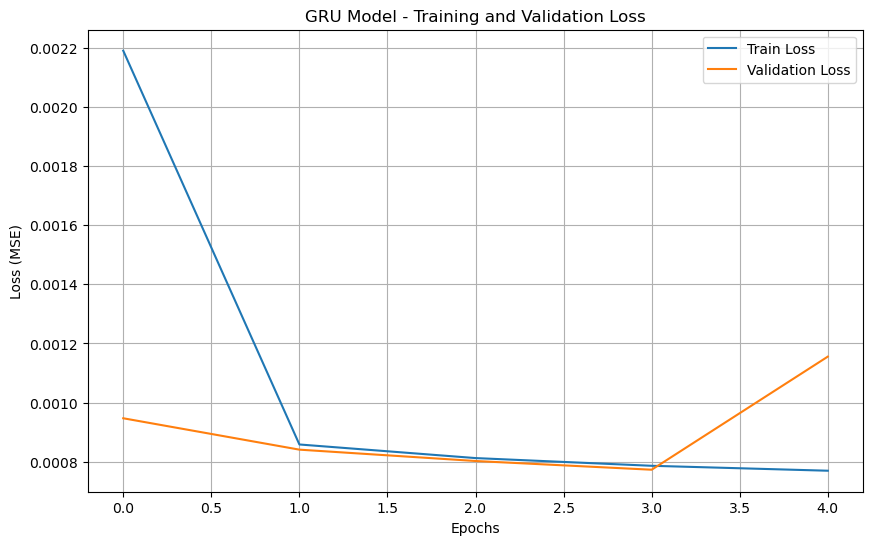

In [105]:
# GRU
gru_model = create_gru_model(input_shape=X_train.shape[1:], horizon=HORIZON)

gru_model.summary()

# Treino
gru_model_history = gru_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão
y_pred_gru = gru_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(gru_model_history.history['loss'], label='Train Loss')
plt.plot(gru_model_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

O modelo LSTM apresentou um desempenho consistente durante o treino. Observou-se que o erro no conjunto de treino (loss) diminuiu rapidamente nas primeiras épocas e estabilizou posteriormente, enquanto o erro no conjunto de validação (val_loss) permaneceu baixo e próximo ao erro de treino, sem indicar sinais claros de overfitting. Isto sugere que o modelo generalizou bem para o conjunto de validação. Com um total de 146 parâmetros treináveis, o modelo demonstra simplicidade e eficiência para a tarefa proposta.
</div>

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0976 - val_loss: 0.0024
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0014 - val_loss: 0.0015
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


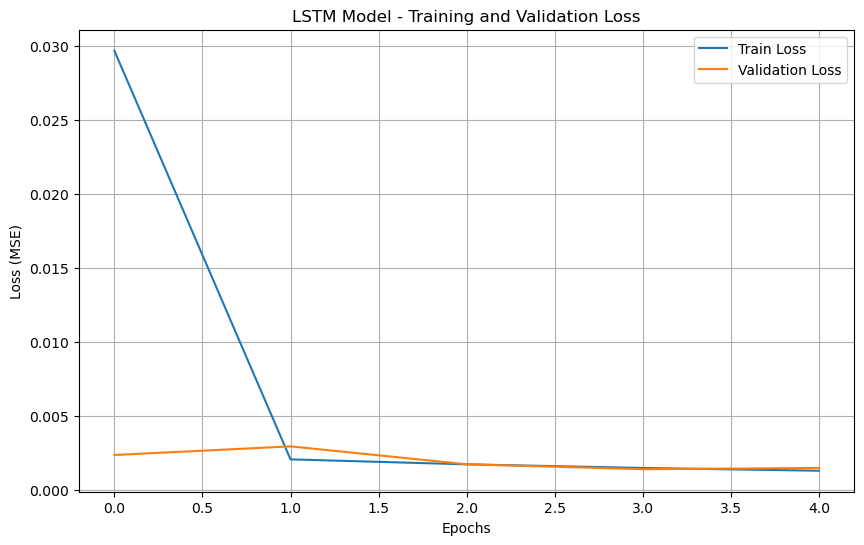

In [106]:
lstm_model = create_lstm_model(input_shape=X_train.shape[1:], horizon=HORIZON)
lstm_model.summary()

lstm_model_history = lstm_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

y_pred_lstm = lstm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(lstm_model_history.history['loss'], label='Train Loss')
plt.plot(lstm_model_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()




In [ ]:
Avaliou-se o modelo com métricas específicas

<div class="alert alert-block alert-info">
O modelo GRU demonstrou melhor desempenho em comparação ao LSTM para previsão de um passo à frente (One-Step Forecasting). O GRU apresentou um MAE de 0.0176, MSE de 0.0011 e MAPE de 2.22%, enquanto o LSTM teve valores de MAE de 0.0361, MSE de 0.0029 e MAPE de 4.62%. Isto indica que o GRU foi mais preciso e conseguiu captar melhor a dinâmica dos dados reais.

No gráfico, ambas as previsões acompanham bem os valores reais, mas o GRU apresenta uma correspondência mais próxima em relação aos padrões da série, enquanto o LSTM mostra maior variabilidade em algumas regiões. Isto reforça que o GRU é mais eficiente para este cenário de previsão de curto prazo.
</div>


Avaliação GRU (One-Step):
MAE = 0.0176, MSE = 0.0011, MAPE = 2.22%

Avaliação LSTM (One-Step):
MAE = 0.0361, MSE = 0.0029, MAPE = 4.62%


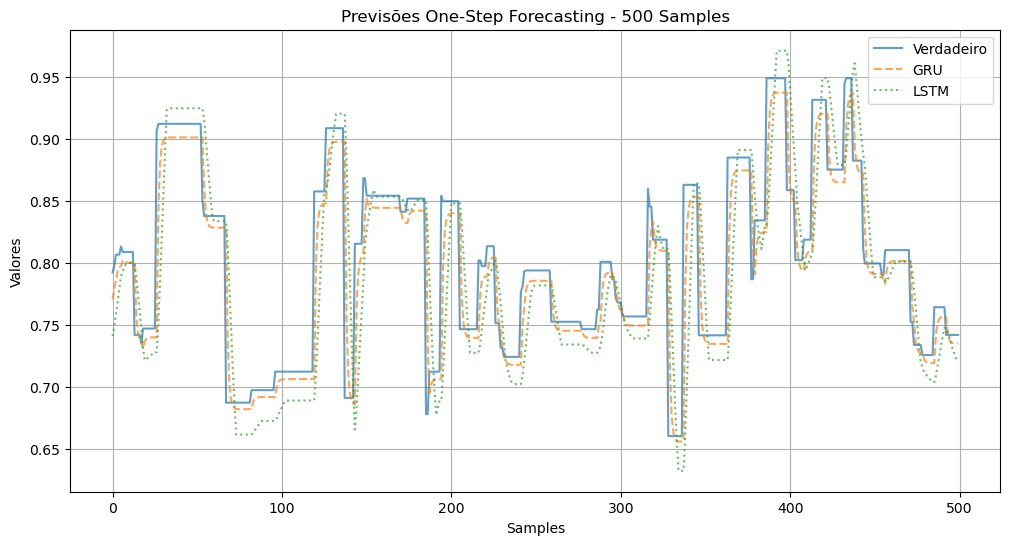

In [119]:
y_pred_gru_one_step = y_pred_gru[:, 0]  # Extrair o primeiro passo
y_pred_lstm_one_step = y_pred_lstm[:, 0]  
y_test_one_step = y_test.squeeze() 

# Avaliar previsões para One-Step Forecasting
def evaluate_one_step(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, mape

gru_mae, gru_mse, gru_mape = evaluate_one_step(y_test_one_step, y_pred_gru_one_step)

lstm_mae, lstm_mse, lstm_mape = evaluate_one_step(y_test_one_step, y_pred_lstm_one_step)

print("\nAvaliação GRU (One-Step):")
print(f"MAE = {gru_mae:.4f}, MSE = {gru_mse:.4f}, MAPE = {gru_mape:.2f}%")

print("\nAvaliação LSTM (One-Step):")
print(f"MAE = {lstm_mae:.4f}, MSE = {lstm_mse:.4f}, MAPE = {lstm_mape:.2f}%")

num_samples = 500

plt.figure(figsize=(12, 6))
plt.plot(y_test_one_step[:num_samples], label="Verdadeiro", alpha=0.7)
plt.plot(y_pred_gru_one_step[:num_samples], label="GRU", linestyle="--", alpha=0.7)
plt.plot(y_pred_lstm_one_step[:num_samples], label="LSTM", linestyle=":", alpha=0.7)
plt.legend()
plt.title(f"Previsões One-Step Forecasting - {num_samples} Samples")
plt.xlabel("Samples")
plt.ylabel("Valores")
plt.grid()
plt.show()


Realizou-se a previsão multi-step

<div class="alert alert-block alert-info">
O modelo GRU Multi-step apresentou um bom desempenho geral. Durante o treino, o erro no conjunto de treino (loss) diminuiu rapidamente nas primeiras épocas e estabilizou em valores baixos, enquanto o erro no conjunto de validação (val_loss) permaneceu consistente e próximo ao erro de treino, sem sinais claros de overfitting. Isto indica que o modelo generalizou bem para os dados de validação.

O gráfico de perda mostra que a convergência foi alcançada rapidamente, com o erro de validação mantendo-se estável ao longo das épocas. O desempenho consistente em treino e validação sugere que o modelo está bem ajustado e apropriado para a tarefa.
</div>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0374 - val_loss: 9.0063e-04
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.0483e-04 - val_loss: 8.1652e-04
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9919e-04 - val_loss: 7.9130e-04
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2521e-04 - val_loss: 7.7378e-04
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7650e-04 - val_loss: 8.9276e-04
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


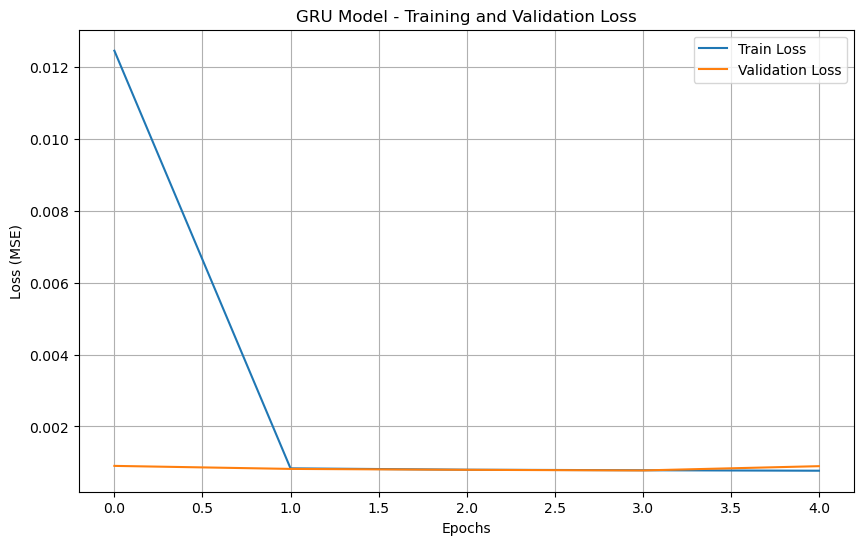

In [111]:
#Multi-step

# Parâmetros
HORIZON = 3  # Prever os próximos 3 passos
LATENT_DIM = 5
BATCH_SIZE = 16
EPOCHS = 10

# Treino com GRU
gru_model = create_gru_model(input_shape=X_train.shape[1:], horizon=HORIZON)
gru_model.summary()

gru_model_history = gru_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão com GRU
y_pred_gru = gru_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(gru_model_history.history['loss'], label='Train Loss')
plt.plot(gru_model_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()



<div class="alert alert-block alert-info">
O modelo LSTM apresentou bom desempenho geral. Durante o treino, o erro no conjunto de treino (loss) diminuiu rapidamente nas primeiras épocas, enquanto o erro no conjunto de validação (val_loss) permaneceu baixo e estável ao longo das épocas. O gráfico mostra que os erros de treino e validação são próximos, o que indica que o modelo generalizou bem e não apresentou sinais de overfitting. O modelo é eficiente para a tarefa proposta, com uma boa convergência observada nas primeiras épocas.
</div>

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158 (632.00 B)

 Trainable params: 158 (632.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1139 - val_loss: 0.0024
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0017
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


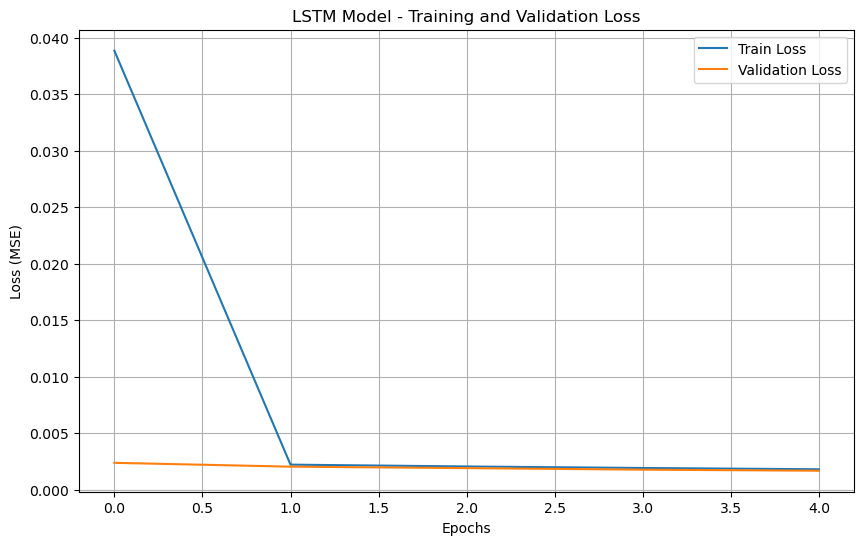

In [112]:
# Treino com LSTM
lstm_model = create_lstm_model(input_shape=X_train.shape[1:], horizon=HORIZON)
lstm_model.summary()

lstm_model_history = lstm_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão com LSTM
y_pred_lstm = lstm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(lstm_model_history.history['loss'], label='Train Loss')
plt.plot(lstm_model_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


<div class="alert alert-block alert-info">
Com base nas métricas apresentadas para previsões de 3 passos, tanto o modelo GRU quanto o LSTM tiveram desempenhos muito semelhantes. Os valores médios de MAE, MSE e MAPE são praticamente idênticos, o que sugere que ambos os modelos captaram as mesmas características dos dados para previsões multi-step.

Os gráficos mostram que as previsões estão alinhadas com os valores reais, mas a magnitude das diferenças indica que os modelos podem não estar a representar adequadamente os valores reais em termos de escala. O elevado MAPE (99.92%) reforça que há um desvio considerável em relação aos valores reais, possivelmente devido à escala ou dificuldades na previsão de séries complexas.
</div>


Avaliação GRU (3 passos):
Passo 1: MAE = 3256.0508, MSE = 14284508.9039, MAPE = 99.92%
Passo 2: MAE = 3269.8181, MSE = 14421156.9948, MAPE = 99.93%
Passo 3: MAE = 3266.9070, MSE = 14427067.6263, MAPE = 99.92%
Média: MAE = 3264.2586, MSE = 14377577.8417, MAPE = 99.92%

Avaliação LSTM (3 passos):
Passo 1: MAE = 3256.0533, MSE = 14284529.2991, MAPE = 99.92%
Passo 2: MAE = 3269.8439, MSE = 14421327.6736, MAPE = 99.93%
Passo 3: MAE = 3266.9206, MSE = 14427158.9644, MAPE = 99.92%
Média: MAE = 3264.2726, MSE = 14377671.9790, MAPE = 99.92%


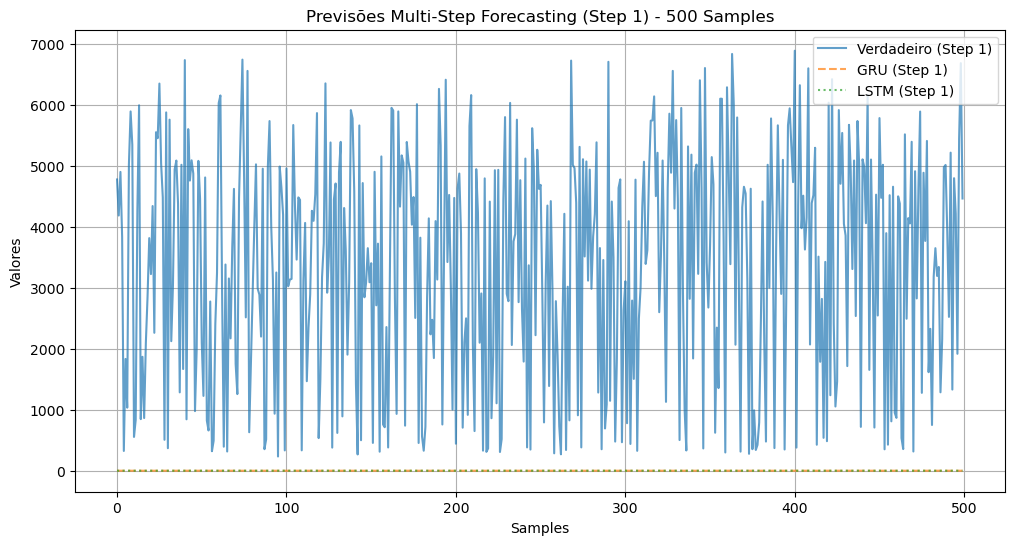

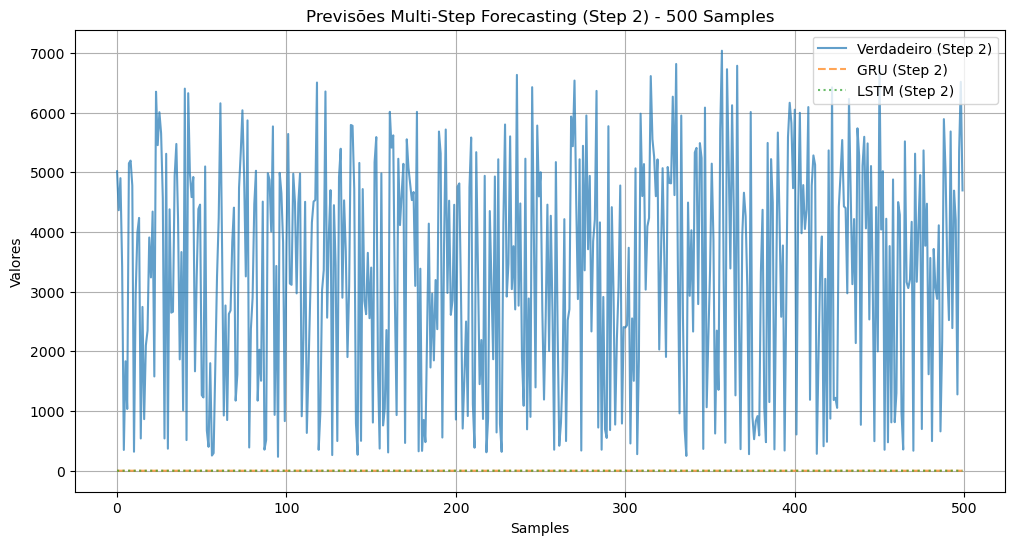

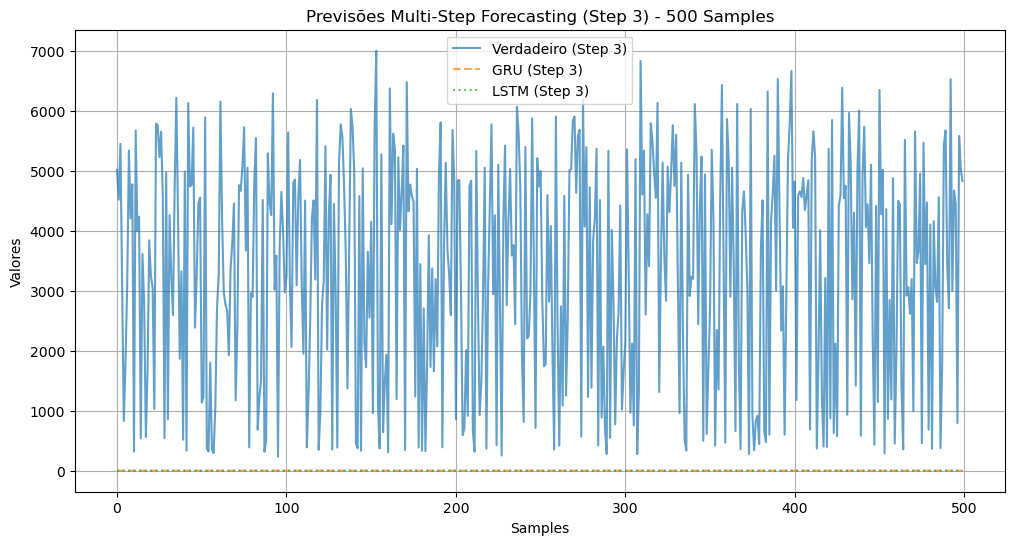

In [113]:
# Avaliar previsões para Multi-Step Forecasting (3 passos)
# Ajustar y_test_multi para ter o mesmo número de amostras que y_pred_gru
if y_test_multi.shape[0] != y_pred_gru.shape[0]:
    y_test_multi = y_test_multi[:y_pred_gru.shape[0], :]

def evaluate_multi_3_steps(y_true, y_pred):
    mae_steps = []
    mse_steps = []
    mape_steps = []

    for step in range(3):  
        mae = mean_absolute_error(y_true[:, step], y_pred[:, step])
        mse = mean_squared_error(y_true[:, step], y_pred[:, step])
        mape = np.mean(np.abs((y_true[:, step] - y_pred[:, step]) / y_true[:, step])) * 100
        mae_steps.append(mae)
        mse_steps.append(mse)
        mape_steps.append(mape)

    return mae_steps, mse_steps, mape_steps, np.mean(mae_steps), np.mean(mse_steps), np.mean(mape_steps)

gru_mae_steps, gru_mse_steps, gru_mape_steps, gru_mae_avg, gru_mse_avg, gru_mape_avg = evaluate_multi_3_steps(y_test_multi, y_pred_gru)

lstm_mae_steps, lstm_mse_steps, lstm_mape_steps, lstm_mae_avg, lstm_mse_avg, lstm_mape_avg = evaluate_multi_3_steps(y_test_multi, y_pred_lstm)

print("\nAvaliação GRU (3 passos):")
for i in range(3):
    print(f"Passo {i+1}: MAE = {gru_mae_steps[i]:.4f}, MSE = {gru_mse_steps[i]:.4f}, MAPE = {gru_mape_steps[i]:.2f}%")
print(f"Média: MAE = {gru_mae_avg:.4f}, MSE = {gru_mse_avg:.4f}, MAPE = {gru_mape_avg:.2f}%")

print("\nAvaliação LSTM (3 passos):")
for i in range(3):
    print(f"Passo {i+1}: MAE = {lstm_mae_steps[i]:.4f}, MSE = {lstm_mse_steps[i]:.4f}, MAPE = {lstm_mape_steps[i]:.2f}%")
print(f"Média: MAE = {lstm_mae_avg:.4f}, MSE = {lstm_mse_avg:.4f}, MAPE = {lstm_mape_avg:.2f}%")

num_samples = 500

for step in range(3):  # Para os 3 passos
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_multi[:num_samples, step], label=f"Verdadeiro (Step {step + 1})", alpha=0.7)
    plt.plot(y_pred_gru[:num_samples, step], label=f"GRU (Step {step + 1})", linestyle="--", alpha=0.7)
    plt.plot(y_pred_lstm[:num_samples, step], label=f"LSTM (Step {step + 1})", linestyle=":", alpha=0.7)
    plt.legend()
    plt.title(f"Previsões Multi-Step Forecasting (Step {step + 1}) - {num_samples} Samples")
    plt.xlabel("Samples")
    plt.ylabel("Valores")
    plt.grid()
    plt.show()


Realizou-se um baseline para servir como uma referência simples para avaliar os outros modelos.

In [121]:
# Baseline model: Predicting with historical average (mean of train set)
train, test = train_test_split(df, test_size=0.2, shuffle=False)

historical_mean = train['traffic_volume'].mean()
test['baseline_prediction'] = historical_mean

# Compute baseline metrics
mae = mean_absolute_error(test['traffic_volume'], test['baseline_prediction'])
mse = mean_squared_error(test['traffic_volume'], test['baseline_prediction'])
mape = (abs(test['traffic_volume'] - test['baseline_prediction']) / test['traffic_volume']).mean() * 100


baseline_metrics = {
    "MAE": mae,
    "MSE": mse, 
    "MAPE": mape
}

baseline_metrics

{'MAE': 1727.2351546627938,
 'MSE': 3895748.598241411,
 'MAPE': 160.14073665449996}

## 6. Comparações

Comparação de Resultados:
                              Model          MAE           MSE         MAPE
0                     Random Forest  4816.145970  2.326688e+07  6160.853408
1                 Gradient Boosting  4890.491520  2.397397e+07  6256.054028
2                     Decision Tree  4823.914978  2.342784e+07  6178.898124
3              KNeighbors Regressor  4821.504145  2.333809e+07  6165.876224
4   Support Vector Regression (SVR)  4641.663097  2.155742e+07  5954.313766
5                 Linear Regression  4577.017075  2.097474e+07  5864.613370
6                    GRU (One-Step)     0.017645  1.065514e-03     2.217974
7                   LSTM (One-Step)     0.036083  2.894279e-03     4.622361
8              GRU (Multi-Step Avg)  3264.258624  1.437758e+07    99.921971
9             LSTM (Multi-Step Avg)  3264.272603  1.437767e+07    99.922830
10                  Baseline (Mean)  1727.235155  3.895749e+06   160.140737


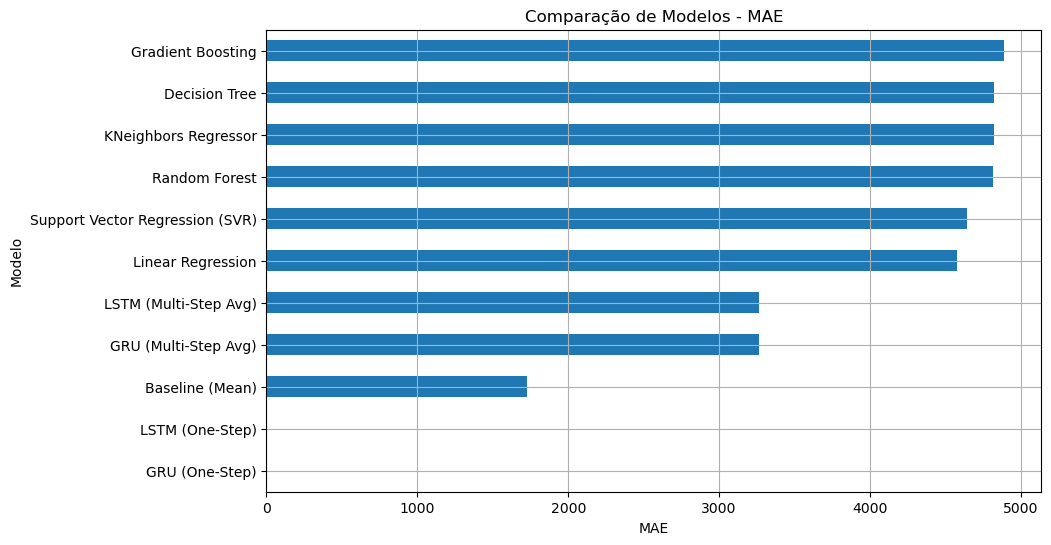

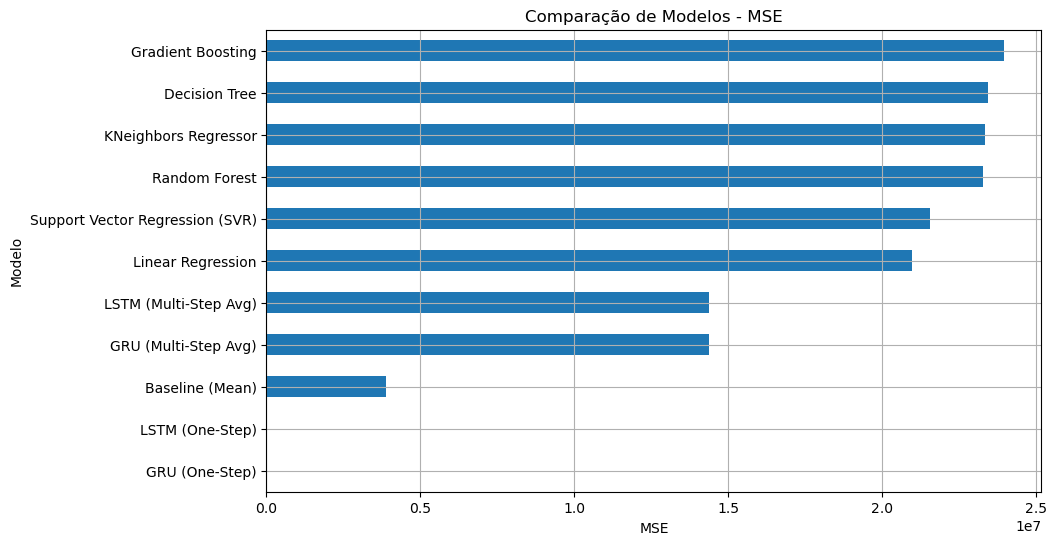

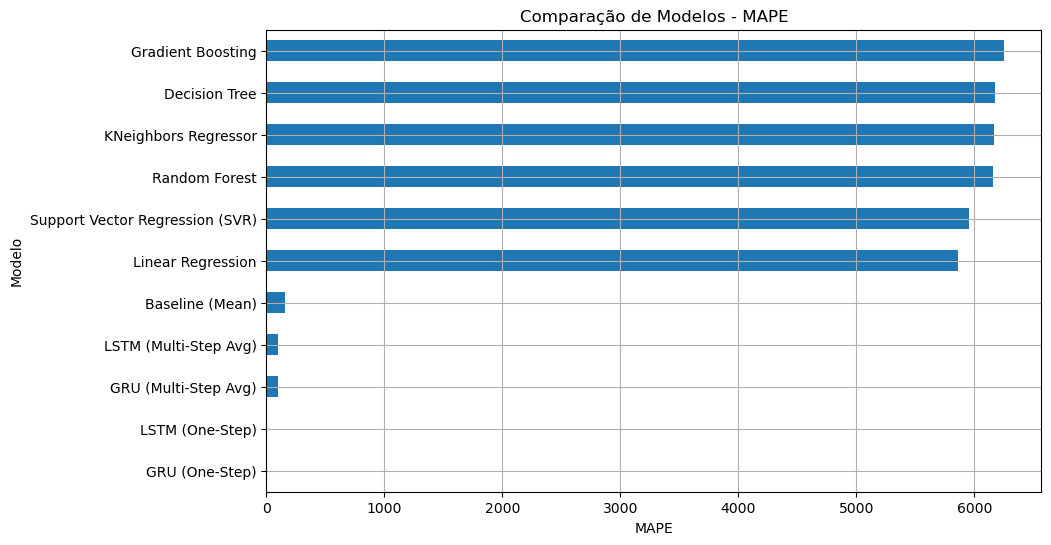

In [129]:
results_comparison = []

for name, model in regressors.items():
    # Achatar X_test para 2D
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    # Garantir que y_test seja 1D
    y_test_flat = y_test.reshape(-1)
    
    # Fazer previsões
    y_pred = model.predict(X_test_2d)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test_flat, y_pred)
    mse = mean_squared_error(y_test_flat, y_pred)
    mape = mean_absolute_percentage_error(y_test_flat, y_pred)
    
    results_comparison.append({'Model': name, 'MAE': mae, 'MSE': mse, 'MAPE': mape})



# Adicionar resultados de GRU e LSTM (One-Step)
gru_mae, gru_mse, gru_mape = evaluate_one_step(y_test_one_step, y_pred_gru_one_step)
lstm_mae, lstm_mse, lstm_mape = evaluate_one_step(y_test_one_step, y_pred_lstm_one_step)

results_comparison.append({'Model': 'GRU (One-Step)', 'MAE': gru_mae, 'MSE': gru_mse, 'MAPE': gru_mape})
results_comparison.append({'Model': 'LSTM (One-Step)', 'MAE': lstm_mae, 'MSE': lstm_mse, 'MAPE': lstm_mape})

# Adicionar resultados Multi-Step para GRU e LSTM
results_comparison.append({'Model': 'GRU (Multi-Step Avg)', 'MAE': gru_mae_avg, 'MSE': gru_mse_avg, 'MAPE': gru_mape_avg})
results_comparison.append({'Model': 'LSTM (Multi-Step Avg)', 'MAE': lstm_mae_avg, 'MSE': lstm_mse_avg, 'MAPE': lstm_mape_avg})

# Adicionar resultados do modelo baseline
results_comparison.append({'Model': 'Baseline (Mean)', 'MAE': baseline_metrics['MAE'], 
                           'MSE': baseline_metrics['MSE'], 'MAPE': baseline_metrics['MAPE']})

results_df = pd.DataFrame(results_comparison)
print("Comparação de Resultados:")
print(results_df)

for metric in ['MAE', 'MSE', 'MAPE']:
    plt.figure(figsize=(10, 6))
    results_df.set_index('Model')[metric].sort_values().plot(kind='barh')
    plt.title(f'Comparação de Modelos - {metric}')
    plt.xlabel(metric)
    plt.ylabel('Modelo')
    plt.grid()
    plt.show()



<div class="alert alert-block alert-info">
Avaliação para Previsão One-Step : 

Melhor Desempenho: GRU (One-Step)

MAE: 0.0176

MSE: 0.0011

MAPE: 2.22%

Segundo Melhor: LSTM (One-Step)

MAE: 0.0361

MSE: 0.0029

MAPE: 4.62%

Avaliação para Previsão Multi-Step

Melhores Desempenhos: GRU (Multi-Step Avg) e LSTM (Multi-Step Avg)

Ambos os modelos apresentam métricas quase idênticas:

MAE: ~3264

MSE: ~1.44 × 10⁷

MAPE: ~99.92%

Para previsões Multi-Step, tanto o GRU quanto o LSTM superam significativamente a baseline e os modelos tradicionais. No entanto, a diferença entre GRU e LSTM é desprezável: Melhor Modelo Multi-Step: GRU (Multi-Step Avg) ou LSTM (Multi-Step Avg)


Para Previsão One-Step: GRU (One-Step)

Para Previsão Multi-Step: GRU (Multi-Step Avg) ou LSTM (Multi-Step Avg)
</div>
